# Plotting cross section ratios as a function of Bjorken-x

<h2 style="text-align: center; color: orange">to test how I was getting those pretty plots I used in my comprehensive</h2>

In [1]:
import uproot, time, sys
start_time = time.time()
sys.path.append('/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2')
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy import stats
from common_functions import read_report, ImportRadcor, target_info, root_hist_to_numpy, csb, jra_nprat, datahist_from_array, mchist_from_array, cereff, baja, E, leaky_cauldron
from common_functions import LD2_dict, C12_dict, Dummy_dict, Fe54_dict, Ca40_dict, Be9_dict, Ca48_dict, B10_dict, B11_dict, He4_dict, He3_dict, C12_dict_l2, delta_correction
from common_functions import Sn119_dict, Ti48_dict, Ag108_dict, Th232_dict, Ni58_dict, Ni64_dict, Li7_dict, Li6_dict, Al27_dict, Cu63_dict, Au197_dict, cafe_report_path, tinfo_path

\begin{equation}
    \sigma^{Born}_{data} = \frac{Y_{data}}{Y_{MC}} \cdot \sigma^{Born}_{MC}
\end{equation}

In [2]:
folder = 'comp'
leaky = 1

ntg = 'B10' # What is the nuclei in numerator?
nsimstring = ntg.lower()
print("nsimstring", nsimstring)
dtg = 'LD2' # What is the nuclei in denominator?
dsimstring = dtg.lower()
print("dsimstring", dsimstring)
ald = 'Dummy' # Aluminium dummy target
dang = 20.0 # What is your desired angle?
dmom = [2.42, 2.71, 3.04, 3.40, 3.81, 4.27, 4.78, 5.36, 5.878, 6.6] # What are your desired central momenta (just the magnitude)
bin_per_mom = 16 # How many bins per momentum?
bin_num = bin_per_mom * len(dmom) # Total number of bins in the combined histogram

# Kinematic variables
ts, idang = dang, int(dang) # Spectrometer angle
Z, A = target_info[ntg][0], target_info[ntg][1]  # Target
thick = target_info[ntg][2] # g/cm2. From Cameron's target sheet column 'R'
# thick = 0.28
ep_min = {}
ep_max = {}

# Constants
Ei, Mp = 10.54, 0.93825 # Beam energcountsy and proton mass in GeV
N_A, Q_E = 6.02e+23, 1.60e-19 # Avogadro's number and charge in 1 electron
dpp_up, dpp_down = 10.0, -10.0 # Momentum acceptance upper and lower limit
cos_ts = np.cos(np.deg2rad(ts))
sin_ts = np.sin(np.deg2rad(ts))

for momentum in dmom:
    ep_min[momentum] = momentum * (1 + 0.01 * dpp_down)
    ep_max[momentum] = momentum * (1 + 0.01 * dpp_up)
    phi_up, phi_down, theta_up, theta_down = 100.0, -100.0, 65.0, -65.0 # mrad
    domega = (phi_up - phi_down) * (theta_up - theta_down) / 1e6  # diff solid angle in sr
    sim_charge = 1.
    lumin = thick * sim_charge / A * N_A / Q_E * 1e-39

nsimstring c12
dsimstring ld2


<h1 align="center">DATA WORK FOR NTG</h1>

In [3]:
target_dict_name = f'{ntg}_dict'
# target_dict_name = f'{ntg}_dict_l2' # To read ladder 2 carbon runs
target_dict = globals()[target_dict_name]
delta_hist = {}
theta_dict = {}
track_hist = {}
eff_weight = {}
data_delta = np.linspace(-8.0, 8.0, bin_per_mom + 1)

for momentum in dmom:
    files = [f'/Volumes/smriti/xem2/ROOTfiles/HMS_{run}_skim.root' for run in target_dict[momentum]]
    branches = ['H_gtr_dp', 'H_cal_etottracknorm', 'H_gtr_ph', 'H_gtr_th', 'H_cer_npeSum', 'H_bcm_CurrentFlag', 'H_dc_ntrack']
    electrons = uproot.concatenate(files, branches)

    # data_cut = (np.abs(electrons['H_gtr_dp']) < 8) & (electrons['H_cal_etottracknorm'] > 0.7) & (np.abs(electrons['H_gtr_ph']) < 0.032) & (np.abs(electrons['H_gtr_th']) < 0.085) & (electrons['H_cer_npeSum'] > 2) & (electrons['H_bcm_CurrentFlag'] == 1 ) & (electrons['H_dc_ntrack'] == 1)
    data_cut = (np.abs(electrons['H_gtr_dp']) < 8) & (electrons['H_cal_etottracknorm'] > 0.7) & (np.abs(electrons['H_gtr_ph']) < 0.032) & (np.abs(electrons['H_gtr_th']) < 0.085) & (electrons['H_cer_npeSum'] > 2) & (electrons['H_bcm_CurrentFlag'] == 1 )
    dp_cut = electrons['H_gtr_dp'][data_cut]
    theta_cut = electrons['H_gtr_th'][data_cut]
    phi_cut = electrons['H_gtr_ph'][data_cut]

    track_hist[momentum] = electrons['H_dc_ntrack'][data_cut]
    # Cherenkov efficiency correction
    eff_weight[momentum] = 1 / cereff(dp_cut)

    theta_dict[momentum] = np.rad2deg(np.arccos((cos_ts + phi_cut * sin_ts) / np.sqrt(1 + theta_cut * theta_cut + phi_cut * phi_cut)))
    delta_hist[momentum] = np.array(dp_cut)

1.0 50.0


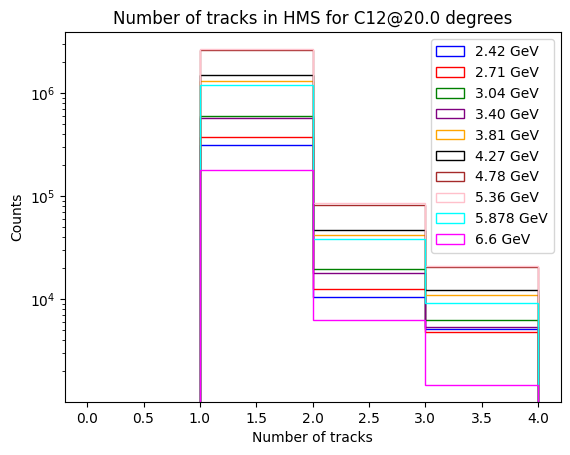

In [4]:
plt.hist(track_hist[2.42], bins = range(0, 5), histtype = 'step', label = '2.42 GeV', color = 'blue')
plt.hist(track_hist[2.71], bins = range(0, 5), histtype = 'step', label = '2.71 GeV', color = 'red')
plt.hist(track_hist[3.04], bins = range(0, 5), histtype = 'step', label = '3.04 GeV', color = 'green')
plt.hist(track_hist[3.40], bins = range(0, 5), histtype = 'step', label = '3.40 GeV', color = 'purple')
plt.hist(track_hist[3.81], bins = range(0, 5), histtype = 'step', label = '3.81 GeV', color = 'orange')
plt.hist(track_hist[4.27], bins = range(0, 5), histtype = 'step', label = '4.27 GeV', color = 'black')
plt.hist(track_hist[4.78], bins = range(0, 5), histtype = 'step', label = '4.78 GeV', color = 'brown')
plt.hist(track_hist[5.36], bins = range(0, 5), histtype = 'step', label = '5.36 GeV', color = 'pink')
plt.hist(track_hist[5.878], bins = range(0, 5), histtype = 'step', label = '5.878 GeV', color = 'cyan')
plt.hist(track_hist[6.6], bins = range(0, 5), histtype = 'step', label = '6.6 GeV', color = 'magenta')
plt.yscale('log')
plt.legend()
plt.ylabel('Counts')
plt.xlabel('Number of tracks')
plt.title(f'Number of tracks in HMS for {ntg}@{dang} degrees')
plt.savefig(f'{folder}/track_hist_{time.time():.0f}.pdf')
min = np.min(track_hist[2.42])
bada = np.max(track_hist[2.42])
print(min, bada)

In [5]:
k = 0
ot = 0
for mom in dmom:
    for i in track_hist[mom]:
        if i > 1:
            k += 1
        else:
            ot += 1
    print(f'Percentage of tracks for {mom}GeV with more than 1 hit: {(k/ot) * 100:.2f}%')

Percentage of tracks for 2.42GeV with more than 1 hit: 5.36%
Percentage of tracks for 2.71GeV with more than 1 hit: 5.09%
Percentage of tracks for 3.04GeV with more than 1 hit: 4.86%
Percentage of tracks for 3.4GeV with more than 1 hit: 4.69%
Percentage of tracks for 3.81GeV with more than 1 hit: 4.51%
Percentage of tracks for 4.27GeV with more than 1 hit: 4.39%
Percentage of tracks for 4.78GeV with more than 1 hit: 4.30%
Percentage of tracks for 5.36GeV with more than 1 hit: 4.28%
Percentage of tracks for 5.878GeV with more than 1 hit: 4.26%
Percentage of tracks for 6.6GeV with more than 1 hit: 4.26%


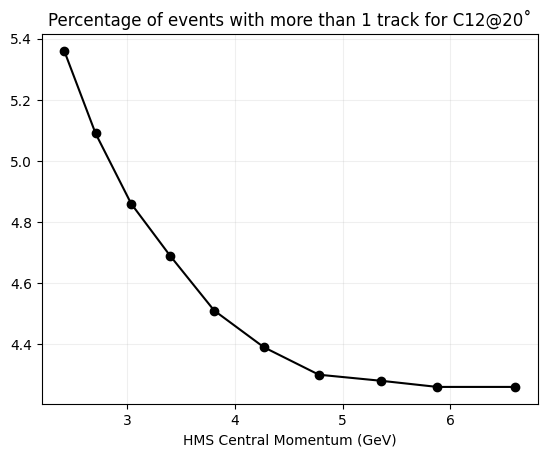

In [6]:
percentages = [5.36, 5.09, 4.86, 4.69, 4.51, 4.39, 4.30, 4.28, 4.26, 4.26]
plt.plot(dmom, percentages, marker = 'o', color = 'black')
plt.xlabel('HMS Central Momentum (GeV)')
plt.title(f'Percentage of events with more than 1 track for {ntg}@{idang}˚')
plt.grid(alpha = 0.2)
# plt.savefig(f'{folder}/track_percentage_{time.time():.0f}.pdf')

Mean scaling factor for C12 at 2.42 GeV/c is 0.00017111555960878526
Total scaling factor for C12 at 2.42 GeV/c is 11688.007826830715
Scaling factor for C12 at 2.42 GeV/c is 8.555777980439263e-05
Counts for C12 at 2.42 GeV is 22918.75125074965
Mean scaling factor for C12 at 2.71 GeV/c is 0.00013381371810957993
Total scaling factor for C12 at 2.71 GeV/c is 14946.150725460016
Scaling factor for C12 at 2.71 GeV/c is 6.690685905478996e-05
Counts for C12 at 2.71 GeV is 27391.434860915626
Mean scaling factor for C12 at 3.04 GeV/c is 7.80192596113818e-05
Total scaling factor for C12 at 3.04 GeV/c is 25634.695970739907
Scaling factor for C12 at 3.04 GeV/c is 3.90096298056909e-05
Counts for C12 at 3.04 GeV is 43564.13848308847
Mean scaling factor for C12 at 3.4 GeV/c is 7.424755953954052e-05
Total scaling factor for C12 at 3.4 GeV/c is 26936.912302617842
Scaling factor for C12 at 3.4 GeV/c is 3.712377976977026e-05
Counts for C12 at 3.4 GeV is 42517.51050630191
Mean scaling factor for C12 at 3.81

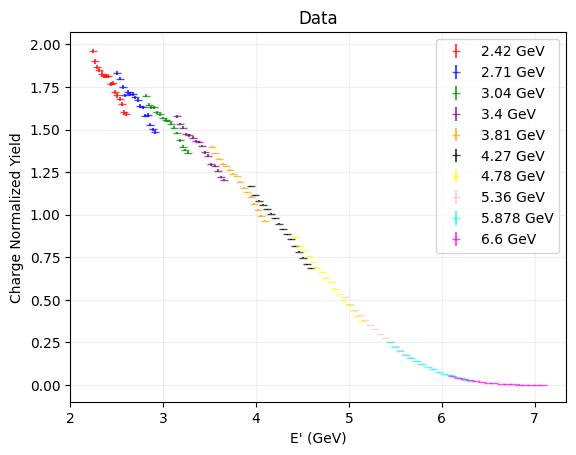

In [7]:
# Calculate the charge normalized yield and the uncertainty per bin
if ntg == 'He3' and leaky == 1:
    print("Analyzing leaky runs")
    delta_bin_contents_2p42_ntg, delta_bin_errors_2p42_ntg = datahist_from_array(delta_hist[2.42], 2.42, data_delta, ntg, eff_weight[2.42] / 1.0015)
    delta_bin_contents_2p71_ntg, delta_bin_errors_2p71_ntg = datahist_from_array(delta_hist[2.71], 2.71, data_delta, ntg, eff_weight[2.71] / 1.0537)
    delta_bin_contents_3p04_ntg, delta_bin_errors_3p04_ntg = datahist_from_array(delta_hist[3.04], 3.04, data_delta, ntg, eff_weight[3.04] / 1.0539)
    delta_bin_contents_3p4_ntg, delta_bin_errors_3p4_ntg = datahist_from_array(delta_hist[3.4], 3.4, data_delta, ntg, eff_weight[3.4] / 1.0818)
    delta_bin_contents_3p81_ntg, delta_bin_errors_3p81_ntg = datahist_from_array(delta_hist[3.81], 3.81, data_delta, ntg, eff_weight[3.81] / 1.0838)
    delta_bin_contents_4p27_ntg, delta_bin_errors_4p27_ntg = datahist_from_array(delta_hist[4.27], 4.27, data_delta, ntg, eff_weight[4.27] / 1.1104)
    delta_bin_contents_4p78_ntg, delta_bin_errors_4p78_ntg = datahist_from_array(delta_hist[4.78], 4.78, data_delta, ntg, eff_weight[4.78] / 1.1141)
    delta_bin_contents_5p36_ntg, delta_bin_errors_5p36_ntg = datahist_from_array(delta_hist[5.36], 5.36, data_delta, ntg, eff_weight[5.36] / 1.1810)
    delta_bin_contents_5p878_ntg, delta_bin_errors_5p878_ntg = datahist_from_array(delta_hist[5.878], 5.878, data_delta, ntg, eff_weight[5.878] / 1.18045)
    delta_bin_contents_6p6_ntg, delta_bin_errors_6p6_ntg = datahist_from_array(delta_hist[6.6], 6.6, data_delta, ntg, eff_weight[6.6] / 1.5401)
else:
    delta_bin_contents_2p42_ntg, delta_bin_errors_2p42_ntg = datahist_from_array(delta_hist[2.42], 2.42, data_delta, ntg, eff_weight[2.42])
    delta_bin_contents_2p71_ntg, delta_bin_errors_2p71_ntg = datahist_from_array(delta_hist[2.71], 2.71, data_delta, ntg, eff_weight[2.71])
    delta_bin_contents_3p04_ntg, delta_bin_errors_3p04_ntg = datahist_from_array(delta_hist[3.04], 3.04, data_delta, ntg, eff_weight[3.04])
    delta_bin_contents_3p4_ntg, delta_bin_errors_3p4_ntg = datahist_from_array(delta_hist[3.4], 3.4, data_delta, ntg, eff_weight[3.4])
    delta_bin_contents_3p81_ntg, delta_bin_errors_3p81_ntg = datahist_from_array(delta_hist[3.81], 3.81, data_delta, ntg, eff_weight[3.81])
    delta_bin_contents_4p27_ntg, delta_bin_errors_4p27_ntg = datahist_from_array(delta_hist[4.27], 4.27, data_delta, ntg, eff_weight[4.27])
    delta_bin_contents_4p78_ntg, delta_bin_errors_4p78_ntg = datahist_from_array(delta_hist[4.78], 4.78, data_delta, ntg, eff_weight[4.78])
    delta_bin_contents_5p36_ntg, delta_bin_errors_5p36_ntg = datahist_from_array(delta_hist[5.36], 5.36, data_delta, ntg, eff_weight[5.36])
    delta_bin_contents_5p878_ntg, delta_bin_errors_5p878_ntg = datahist_from_array(delta_hist[5.878], 5.878, data_delta, ntg, eff_weight[5.878])
    delta_bin_contents_6p6_ntg, delta_bin_errors_6p6_ntg = datahist_from_array(delta_hist[6.6], 6.6, data_delta, ntg, eff_weight[6.6])

_, delta_bin_edges_2p42 = np.histogram(delta_hist[2.42], bins = data_delta)
_, delta_bin_edges_2p71 = np.histogram(delta_hist[2.71], bins = data_delta)
_, delta_bin_edges_3p04 = np.histogram(delta_hist[3.04], bins = data_delta)
_, delta_bin_edges_3p4 = np.histogram(delta_hist[3.4], bins = data_delta)
_, delta_bin_edges_3p81 = np.histogram(delta_hist[3.81], bins = data_delta)
_, delta_bin_edges_4p27 = np.histogram(delta_hist[4.27], bins = data_delta)
_, delta_bin_edges_4p78 = np.histogram(delta_hist[4.78], bins = data_delta)
_, delta_bin_edges_5p36 = np.histogram(delta_hist[5.36], bins = data_delta)
_, delta_bin_edges_5p878 = np.histogram(delta_hist[5.878], bins = data_delta)
_, delta_bin_edges_6p6 = np.histogram(delta_hist[6.6], bins = data_delta)

delta_bin_centers_2p42 = (delta_bin_edges_2p42[:-1] + delta_bin_edges_2p42[1:]) / 2
delta_bin_centers_2p71 = (delta_bin_edges_2p71[:-1] + delta_bin_edges_2p71[1:]) / 2
delta_bin_centers_3p04 = (delta_bin_edges_3p04[:-1] + delta_bin_edges_3p04[1:]) / 2
delta_bin_centers_3p4 = (delta_bin_edges_3p4[:-1] + delta_bin_edges_3p4[1:]) / 2
delta_bin_centers_3p81 = (delta_bin_edges_3p81[:-1] + delta_bin_edges_3p81[1:]) / 2
delta_bin_centers_4p27 = (delta_bin_edges_4p27[:-1] + delta_bin_edges_4p27[1:]) / 2
delta_bin_centers_4p78 = (delta_bin_edges_4p78[:-1] + delta_bin_edges_4p78[1:]) / 2
delta_bin_centers_5p36 = (delta_bin_edges_5p36[:-1] + delta_bin_edges_5p36[1:]) / 2
delta_bin_centers_5p878 = (delta_bin_edges_5p878[:-1] + delta_bin_edges_5p878[1:]) / 2
delta_bin_centers_6p6 = (delta_bin_edges_6p6[:-1] + delta_bin_edges_6p6[1:]) / 2

binned_eprime_bin_centers_2p42 = 2.42 * (1 + 0.01 * delta_bin_centers_2p42)
binned_eprime_bin_centers_2p71 = 2.71 * (1 + 0.01 * delta_bin_centers_2p71)
binned_eprime_bin_centers_3p04 = 3.04 * (1 + 0.01 * delta_bin_centers_3p04)
binned_eprime_bin_centers_3p4 = 3.4 * (1 + 0.01 * delta_bin_centers_3p4)
binned_eprime_bin_centers_3p81 = 3.81 * (1 + 0.01 * delta_bin_centers_3p81)
binned_eprime_bin_centers_4p27 = 4.27 * (1 + 0.01 * delta_bin_centers_4p27)
binned_eprime_bin_centers_4p78 = 4.78 * (1 + 0.01 * delta_bin_centers_4p78)
binned_eprime_bin_centers_5p36 = 5.36 * (1 + 0.01 * delta_bin_centers_5p36)
binned_eprime_bin_centers_5p878 = 5.878 * (1 + 0.01 * delta_bin_centers_5p878)
binned_eprime_bin_centers_6p6 = 6.6 * (1 + 0.01 * delta_bin_centers_6p6)

# Calculate the charge symmetric background fraction per bin
csb_frac_2p42_ntg = csb(binned_eprime_bin_centers_2p42, ntg, dang)
csb_frac_2p71_ntg = csb(binned_eprime_bin_centers_2p71, ntg, dang)
csb_frac_3p04_ntg = csb(binned_eprime_bin_centers_3p04, ntg, dang)
csb_frac_3p4_ntg = csb(binned_eprime_bin_centers_3p4, ntg, dang)
csb_frac_3p81_ntg = csb(binned_eprime_bin_centers_3p81, ntg, dang)
csb_frac_4p27_ntg = csb(binned_eprime_bin_centers_4p27, ntg, dang)
csb_frac_4p78_ntg = csb(binned_eprime_bin_centers_4p78, ntg, dang)
csb_frac_5p36_ntg = csb(binned_eprime_bin_centers_5p36, ntg, dang)
csb_frac_5p878_ntg = csb(binned_eprime_bin_centers_5p878, ntg, dang)
csb_frac_6p6_ntg = csb(binned_eprime_bin_centers_6p6, ntg, dang)

# Subtract the charge symmetric background fraction from the total yield
subtracted_csb_contents_2p42_ntg = delta_bin_contents_2p42_ntg * (1 - csb_frac_2p42_ntg)
subtracted_csb_contents_2p71_ntg = delta_bin_contents_2p71_ntg * (1 - csb_frac_2p71_ntg)
subtracted_csb_contents_3p04_ntg = delta_bin_contents_3p04_ntg * (1 - csb_frac_3p04_ntg)
subtracted_csb_contents_3p4_ntg = delta_bin_contents_3p4_ntg * (1 - csb_frac_3p4_ntg)
subtracted_csb_contents_3p81_ntg = delta_bin_contents_3p81_ntg * (1 - csb_frac_3p81_ntg)
subtracted_csb_contents_4p27_ntg = delta_bin_contents_4p27_ntg * (1 - csb_frac_4p27_ntg)
subtracted_csb_contents_4p78_ntg = delta_bin_contents_4p78_ntg * (1 - csb_frac_4p78_ntg)
subtracted_csb_contents_5p36_ntg = delta_bin_contents_5p36_ntg * (1 - csb_frac_5p36_ntg)
subtracted_csb_contents_5p878_ntg = delta_bin_contents_5p878_ntg * (1 - csb_frac_5p878_ntg)
subtracted_csb_contents_6p6_ntg = delta_bin_contents_6p6_ntg * (1 - csb_frac_6p6_ntg)

# Add the errors in quadrature
subtracted_csb_errors_2p42_ntg = delta_bin_errors_2p42_ntg * (1 - csb_frac_2p42_ntg)
subtracted_csb_errors_2p71_ntg = delta_bin_errors_2p71_ntg * (1 - csb_frac_2p71_ntg)
subtracted_csb_errors_3p04_ntg = delta_bin_errors_3p04_ntg * (1 - csb_frac_3p04_ntg)
subtracted_csb_errors_3p4_ntg = delta_bin_errors_3p4_ntg * (1 - csb_frac_3p4_ntg)
subtracted_csb_errors_3p81_ntg = delta_bin_errors_3p81_ntg * (1 - csb_frac_3p81_ntg)
subtracted_csb_errors_4p27_ntg = delta_bin_errors_4p27_ntg * (1 - csb_frac_4p27_ntg)
subtracted_csb_errors_4p78_ntg = delta_bin_errors_4p78_ntg * (1 - csb_frac_4p78_ntg)
subtracted_csb_errors_5p36_ntg = delta_bin_errors_5p36_ntg * (1 - csb_frac_5p36_ntg)
subtracted_csb_errors_5p878_ntg = delta_bin_errors_5p878_ntg * (1 - csb_frac_5p878_ntg)
subtracted_csb_errors_6p6_ntg = delta_bin_errors_6p6_ntg * (1 - csb_frac_6p6_ntg)

# fig refers to the entire canvas on which plots are drawn. ax refers to a single plot/subplot
fig, ax = plt.subplots()
ax.errorbar(binned_eprime_bin_centers_2p42, delta_bin_contents_2p42_ntg, yerr = delta_bin_errors_2p42_ntg, fmt = '_', color = 'red', alpha = 0.7, label = '2.42 GeV')
ax.errorbar(binned_eprime_bin_centers_2p71, delta_bin_contents_2p71_ntg, yerr = delta_bin_errors_2p71_ntg, fmt = '_', color = 'blue', alpha = 0.7, label = '2.71 GeV')
ax.errorbar(binned_eprime_bin_centers_3p04, delta_bin_contents_3p04_ntg, yerr = delta_bin_errors_3p04_ntg, fmt = '_', color = 'green', alpha = 0.7, label = '3.04 GeV')
ax.errorbar(binned_eprime_bin_centers_3p4, delta_bin_contents_3p4_ntg, yerr = delta_bin_errors_3p4_ntg, fmt = '_', color = 'purple', alpha = 0.7, label = '3.4 GeV')
ax.errorbar(binned_eprime_bin_centers_3p81, delta_bin_contents_3p81_ntg, yerr = delta_bin_errors_3p81_ntg, fmt = '_', color = 'orange', alpha = 0.7, label = '3.81 GeV')
ax.errorbar(binned_eprime_bin_centers_4p27, delta_bin_contents_4p27_ntg, yerr = delta_bin_errors_4p27_ntg, fmt = '_', color = 'black', alpha = 0.7, label = '4.27 GeV')
ax.errorbar(binned_eprime_bin_centers_4p78, delta_bin_contents_4p78_ntg, yerr = delta_bin_errors_4p78_ntg, fmt = '_', color = 'yellow', alpha = 0.7, label = '4.78 GeV')
ax.errorbar(binned_eprime_bin_centers_5p36, delta_bin_contents_5p36_ntg, yerr = delta_bin_errors_5p36_ntg, fmt = '_', color = 'pink', alpha = 0.7, label = '5.36 GeV')
ax.errorbar(binned_eprime_bin_centers_5p878, delta_bin_contents_5p878_ntg, yerr = delta_bin_errors_5p878_ntg, fmt = '_', color = 'cyan', alpha = 0.7, label = '5.878 GeV')
ax.errorbar(binned_eprime_bin_centers_6p6, delta_bin_contents_6p6_ntg, yerr = delta_bin_errors_6p6_ntg, fmt = '_', color = 'magenta', alpha = 0.7, label = '6.6 GeV')
ax.set_ylabel('Charge Normalized Yield')
ax.set_xlabel('E\' (GeV)')
ax.set_title('Data')
ax.legend()
# ax.set_yscale('log')
ax.grid(alpha = 0.2)
# fig.savefig(f'{folder}/{nsimstring}_{dsimstring}_newyield.pdf')

In [8]:
print(delta_bin_contents_2p42_ntg)
print(subtracted_csb_contents_2p42_ntg)

[1.96087747 1.90052303 1.86850521 1.84838706 1.829125   1.81482827
 1.81285926 1.81272985 1.76951025 1.77479574 1.72163346 1.70059185
 1.68083849 1.64846017 1.60629106 1.59066015]
[1.87473308 1.82133026 1.79465657 1.77909605 1.7640876  1.75362267
 1.75486894 1.75773015 1.718587   1.72635094 1.6770601  1.65883088
 1.64168845 1.6120418  1.57263199 1.5590453 ]


<h1 align = 'center'> TARGET SPECIFIC DATA YIELD CORRECTION</h1>

In [9]:
if ntg == 'Ca48':
    print("Correcting for Ca40 contamination in Ca48 target")
    C = 0.113 # Ratio of Ca40 contamination in Ca48 target to Ca40 target
    cont_tg = 'Ca40'

elif ntg == 'B10':
    print("Correcting for C12 contamination in B10 target")
    C = 0.231 # Ratio of C12 contamination in B10 target to C12 target
    cont_tg = 'C12'

elif ntg == 'B11':
    print("Correcting for C12 contamination in B11 target")
    C = 0.236 # Ratio of C12 contamination in B11 target to C12 target
    cont_tg = 'C12'

elif ntg == 'He3' or ntg == 'LD2':
    print("Performing Aluminum cell wall subtraction")
    C = 0.2165 # Mean of Ratio of upstream & downstream dummy to target cell thickness
    cont_tg = ald
    
else:
    print("No contamination correction needed")
    C = 0

if C != 0:
    cont_dict_name = f'{cont_tg}_dict' # Dictionary containing the runs for the contaminant
    cont_dict = globals()[cont_dict_name]    
    for momentum in dmom:
        files = [f'/Volumes/smriti/xem2/ROOTfiles/HMS_{run}_skim.root' for run in cont_dict[momentum]]
        branches = ['H_gtr_dp', 'H_cal_etottracknorm', 'H_gtr_ph', 'H_gtr_th', 'H_cer_npeSum', 'H_bcm_CurrentFlag']
        electrons = uproot.concatenate(files, branches)

        data_cut = (np.abs(electrons['H_gtr_dp']) < 8) & (electrons['H_cal_etottracknorm'] > 0.7) & (np.abs(electrons['H_gtr_ph']) < 0.032) & (np.abs(electrons['H_gtr_th']) < 0.085) & (electrons['H_cer_npeSum'] > 2) & (electrons['H_bcm_CurrentFlag'] == 1)
        dp_cut = electrons['H_gtr_dp'][data_cut]
        theta_cut = electrons['H_gtr_th'][data_cut]
        phi_cut = electrons['H_gtr_ph'][data_cut]

        eff_weight[momentum] = 1 / cereff(dp_cut) # Cherenkov efficiency correction

        theta_dict[momentum] = np.rad2deg(np.arccos((cos_ts + phi_cut * sin_ts) / np.sqrt(1 + theta_cut * theta_cut + phi_cut * phi_cut)))
        delta_hist[momentum] = np.array(dp_cut)

    # Get yield and yield error from array
    contaminant_eprime_bin_contents_2p42, contaminant_eprime_bin_errors_2p42 = datahist_from_array(delta_hist[2.42], 2.42, data_delta, cont_tg, eff_weight[2.42])
    contaminant_eprime_bin_contents_2p71, contaminant_eprime_bin_errors_2p71 = datahist_from_array(delta_hist[2.71], 2.71, data_delta, cont_tg, eff_weight[2.71])
    contaminant_eprime_bin_contents_3p04, contaminant_eprime_bin_errors_3p04 = datahist_from_array(delta_hist[3.04], 3.04, data_delta, cont_tg, eff_weight[3.04])
    contaminant_eprime_bin_contents_3p4, contaminant_eprime_bin_errors_3p4 = datahist_from_array(delta_hist[3.4], 3.4, data_delta, cont_tg, eff_weight[3.4])
    contaminant_eprime_bin_contents_3p81, contaminant_eprime_bin_errors_3p81 = datahist_from_array(delta_hist[3.81], 3.81, data_delta, cont_tg, eff_weight[3.81])
    contaminant_eprime_bin_contents_4p27, contaminant_eprime_bin_errors_4p27 = datahist_from_array(delta_hist[4.27], 4.27, data_delta, cont_tg, eff_weight[4.27])
    contaminant_eprime_bin_contents_4p78, contaminant_eprime_bin_errors_4p78 = datahist_from_array(delta_hist[4.78], 4.78, data_delta, cont_tg, eff_weight[4.78])
    contaminant_eprime_bin_contents_5p36, contaminant_eprime_bin_errors_5p36 = datahist_from_array(delta_hist[5.36], 5.36, data_delta, cont_tg, eff_weight[5.36])
    contaminant_eprime_bin_contents_5p878, contaminant_eprime_bin_errors_5p878 = datahist_from_array(delta_hist[5.878], 5.878, data_delta, cont_tg, eff_weight[5.878])
    contaminant_eprime_bin_contents_6p6, contaminant_eprime_bin_errors_6p6 = datahist_from_array(delta_hist[6.6], 6.6, data_delta, cont_tg, eff_weight[6.6])

    # Calculate the charge symmetric background fraction per bin for contaminant
    csb_frac_2p42_cont = csb(binned_eprime_bin_centers_2p42, cont_tg, dang)
    csb_frac_2p71_cont = csb(binned_eprime_bin_centers_2p71, cont_tg, dang)
    csb_frac_3p04_cont = csb(binned_eprime_bin_centers_3p04, cont_tg, dang)
    csb_frac_3p4_cont = csb(binned_eprime_bin_centers_3p4, cont_tg, dang)
    csb_frac_3p81_cont = csb(binned_eprime_bin_centers_3p81, cont_tg, dang)
    csb_frac_4p27_cont = csb(binned_eprime_bin_centers_4p27, cont_tg, dang)
    csb_frac_4p78_cont = csb(binned_eprime_bin_centers_4p78, cont_tg, dang)
    csb_frac_5p36_cont = csb(binned_eprime_bin_centers_5p36, cont_tg, dang)
    csb_frac_5p878_cont = csb(binned_eprime_bin_centers_5p878, cont_tg, dang)
    csb_frac_6p6_cont = csb(binned_eprime_bin_centers_6p6, cont_tg, dang)

    # Error propagation
    contaminant_eprime_bin_errors_2p42 = contaminant_eprime_bin_errors_2p42 * (1 - csb_frac_2p42_cont)
    contaminant_eprime_bin_errors_2p71 = contaminant_eprime_bin_errors_2p71 * (1 - csb_frac_2p71_cont)
    contaminant_eprime_bin_errors_3p04 = contaminant_eprime_bin_errors_3p04 * (1 - csb_frac_3p04_cont)
    contaminant_eprime_bin_errors_3p4 = contaminant_eprime_bin_errors_3p4 * (1 - csb_frac_3p4_cont)
    contaminant_eprime_bin_errors_3p81 = contaminant_eprime_bin_errors_3p81 * (1 - csb_frac_3p81_cont)
    contaminant_eprime_bin_errors_4p27 = contaminant_eprime_bin_errors_4p27 * (1 - csb_frac_4p27_cont)
    contaminant_eprime_bin_errors_4p78 = contaminant_eprime_bin_errors_4p78 * (1 - csb_frac_4p78_cont)
    contaminant_eprime_bin_errors_5p36 = contaminant_eprime_bin_errors_5p36 * (1 - csb_frac_5p36_cont)
    contaminant_eprime_bin_errors_5p878 = contaminant_eprime_bin_errors_5p878 * (1 - csb_frac_5p878_cont)
    contaminant_eprime_bin_errors_6p6 = contaminant_eprime_bin_errors_6p6 * (1 - csb_frac_6p6_cont)

    # Subtract CSB from the total yield of the contaminant
    subtracted_bin_contents_2p42_cont = contaminant_eprime_bin_contents_2p42 * (1 - csb_frac_2p42_cont)
    subtracted_bin_contents_2p71_cont = contaminant_eprime_bin_contents_2p71 * (1 - csb_frac_2p71_cont)
    subtracted_bin_contents_3p04_cont = contaminant_eprime_bin_contents_3p04 * (1 - csb_frac_3p04_cont)
    subtracted_bin_contents_3p4_cont = contaminant_eprime_bin_contents_3p4 * (1 - csb_frac_3p4_cont)
    subtracted_bin_contents_3p81_cont = contaminant_eprime_bin_contents_3p81 * (1 - csb_frac_3p81_cont)
    subtracted_bin_contents_4p27_cont = contaminant_eprime_bin_contents_4p27 * (1 - csb_frac_4p27_cont)
    subtracted_bin_contents_4p78_cont = contaminant_eprime_bin_contents_4p78 * (1 - csb_frac_4p78_cont)
    subtracted_bin_contents_5p36_cont = contaminant_eprime_bin_contents_5p36 * (1 - csb_frac_5p36_cont)
    subtracted_bin_contents_5p878_cont = contaminant_eprime_bin_contents_5p878 * (1 - csb_frac_5p878_cont)
    subtracted_bin_contents_6p6_cont = contaminant_eprime_bin_contents_6p6 * (1 - csb_frac_6p6_cont)

    # Perform Contamination Subtraction
    subtracted_bin_contents_2p42_ntg = subtracted_csb_contents_2p42_ntg - (C * subtracted_bin_contents_2p42_cont)
    subtracted_bin_contents_2p71_ntg = subtracted_csb_contents_2p71_ntg - (C * subtracted_bin_contents_2p71_cont)
    subtracted_bin_contents_3p04_ntg = subtracted_csb_contents_3p04_ntg - (C * subtracted_bin_contents_3p04_cont)
    subtracted_bin_contents_3p4_ntg = subtracted_csb_contents_3p4_ntg - (C * subtracted_bin_contents_3p4_cont)
    subtracted_bin_contents_3p81_ntg = subtracted_csb_contents_3p81_ntg - (C * subtracted_bin_contents_3p81_cont)
    subtracted_bin_contents_4p27_ntg = subtracted_csb_contents_4p27_ntg - (C * subtracted_bin_contents_4p27_cont)
    subtracted_bin_contents_4p78_ntg = subtracted_csb_contents_4p78_ntg - (C * subtracted_bin_contents_4p78_cont)
    subtracted_bin_contents_5p36_ntg = subtracted_csb_contents_5p36_ntg - (C * subtracted_bin_contents_5p36_cont)
    subtracted_bin_contents_5p878_ntg = subtracted_csb_contents_5p878_ntg - (C * subtracted_bin_contents_5p878_cont)
    subtracted_bin_contents_6p6_ntg = subtracted_csb_contents_6p6_ntg - (C * subtracted_bin_contents_6p6_cont)

    # Add the errors in quadrature
    subtracted_bin_errors_2p42_ntg = np.sqrt((subtracted_csb_errors_2p42_ntg)**2 + (C * contaminant_eprime_bin_errors_2p42)**2)
    subtracted_bin_errors_2p71_ntg = np.sqrt((subtracted_csb_errors_2p71_ntg)**2 + (C * contaminant_eprime_bin_errors_2p71)**2)
    subtracted_bin_errors_3p04_ntg = np.sqrt((subtracted_csb_errors_3p04_ntg)**2 + (C * contaminant_eprime_bin_errors_3p04)**2)
    subtracted_bin_errors_3p4_ntg = np.sqrt((subtracted_csb_errors_3p4_ntg)**2 + (C * contaminant_eprime_bin_errors_3p4)**2)
    subtracted_bin_errors_3p81_ntg = np.sqrt((subtracted_csb_errors_3p81_ntg)**2 + (C * contaminant_eprime_bin_errors_3p81)**2)
    subtracted_bin_errors_4p27_ntg = np.sqrt((subtracted_csb_errors_4p27_ntg)**2 + (C * contaminant_eprime_bin_errors_4p27)**2)
    subtracted_bin_errors_4p78_ntg = np.sqrt((subtracted_csb_errors_4p78_ntg)**2 + (C * contaminant_eprime_bin_errors_4p78)**2)
    subtracted_bin_errors_5p36_ntg = np.sqrt((subtracted_csb_errors_5p36_ntg)**2 + (C * contaminant_eprime_bin_errors_5p36)**2)
    subtracted_bin_errors_5p878_ntg = np.sqrt((subtracted_csb_errors_5p878_ntg)**2 + (C * contaminant_eprime_bin_errors_5p878)**2)
    subtracted_bin_errors_6p6_ntg = np.sqrt((subtracted_csb_errors_6p6_ntg)**2 + (C * contaminant_eprime_bin_errors_6p6)**2)

    fig, ax = plt.subplots()
    ax.errorbar(binned_eprime_bin_centers_2p42, subtracted_bin_contents_2p42_ntg, yerr = subtracted_bin_errors_2p42_ntg, fmt = '_', color = 'red', alpha = 0.7, label = '2.42 GeV') 
    ax.errorbar(binned_eprime_bin_centers_2p71, subtracted_bin_contents_2p71_ntg, yerr = subtracted_bin_errors_2p71_ntg, fmt = '_', color = 'blue', alpha = 0.7, label = '2.71 GeV')
    ax.errorbar(binned_eprime_bin_centers_3p04, subtracted_bin_contents_3p04_ntg, yerr = subtracted_bin_errors_3p04_ntg, fmt = '_', color = 'green', alpha = 0.7, label = '3.04 GeV')
    ax.errorbar(binned_eprime_bin_centers_3p4, subtracted_bin_contents_3p4_ntg, yerr = subtracted_bin_errors_3p4_ntg, fmt = '_', color = 'orange', alpha = 0.7, label = '3.4 GeV')
    ax.errorbar(binned_eprime_bin_centers_3p81, subtracted_bin_contents_3p81_ntg, yerr = subtracted_bin_errors_3p81_ntg, fmt = '_', color = 'purple', alpha = 0.7, label = '3.81 GeV')
    ax.errorbar(binned_eprime_bin_centers_4p27, subtracted_bin_contents_4p27_ntg, yerr = subtracted_bin_errors_4p27_ntg, fmt = '_', color = 'yellow', alpha = 0.7, label = '4.27 GeV')
    ax.errorbar(binned_eprime_bin_centers_4p78, subtracted_bin_contents_4p78_ntg, yerr = subtracted_bin_errors_4p78_ntg, fmt = '_', color = 'pink', alpha = 0.7, label = '4.78 GeV')
    ax.errorbar(binned_eprime_bin_centers_5p36, subtracted_bin_contents_5p36_ntg, yerr = subtracted_bin_errors_5p36_ntg, fmt = '_', color = 'brown', alpha = 0.7, label = '5.36 GeV')
    ax.errorbar(binned_eprime_bin_centers_5p878, subtracted_bin_contents_5p878_ntg, yerr = subtracted_bin_errors_5p878_ntg, fmt = '_', color = 'cyan', alpha = 0.7, label = '5.878 GeV')
    ax.errorbar(binned_eprime_bin_centers_6p6, subtracted_bin_contents_6p6_ntg, yerr = subtracted_bin_errors_6p6_ntg, fmt = '_', color = 'limegreen', alpha = 0.7, label = '6.6 GeV')
    ax.set_xlabel('Eprime (GeV)')
    ax.set_ylabel('Charge Normalized Yield')
    ax.set_title('Data-Contamination Subtracted')
    ax.grid(alpha = 0.2)
    # ax.set_yscale('log')
    # fig.savefig(f'{folder}/plots/contamination_subtraction_yield_{ntg}_{time.time():.0f}.pdf')

No contamination correction needed


<h1 align="center">SIMULATION WORK FOR NTG</h1>


Should be -8 and +8 -7.999982796143737 7.999997124541551


Text(0.5, 1.0, 'C12@20.0˚ Simulation')

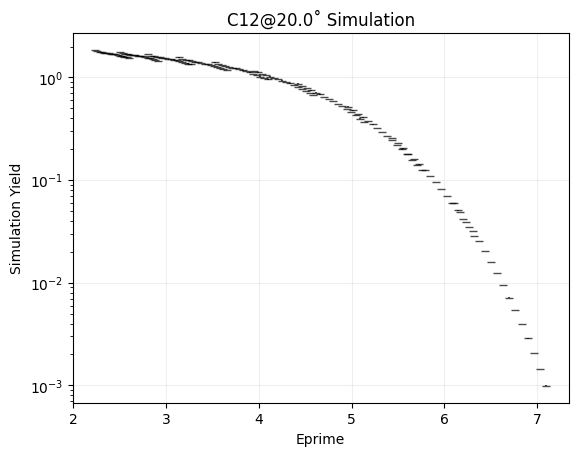

In [10]:
# Read the Cross-section table
V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13 = ImportRadcor(f"/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/xsec_tables_old/xem2_{idang}deg{nsimstring}22_hms.out")

Eprime_dict = {}
delta_dict = {}
xsec_array = {}
mc_scale = {}
thetadict = {}
ytar_weight = {}
ytarcut = {}
jacobian_weight = {}
delta_weight = {}

for momentum in dmom:
    mom_str = str(momentum).replace('-', '').replace('.', 'p').rstrip('0')
    # mom_str = str(momentum).replace('-', '').replace('.', 'p')
    # filepath = f"/Volumes/smriti/xem2/worksim/hms_mc_{nsimstring}_{idang}degm{mom_str}.root"
    # New MC files
    filepath = f"/Volumes/smriti/xem2/worksim/hms_{idang}deg_{mom_str}gev_{nsimstring}.root"

    # Open the file and tree
    file = uproot.open(filepath)
    tree = file["h10"]

    # Load the branches
    electrons = tree.arrays(["hsdeltai", "hsytar", "hsyptari", "hsxptari", "stop_id"], library = 'np')    
    nentries = len(electrons["hsdeltai"])

    # Apply the cuts
    mc_cut = (np.abs(electrons["hsdeltai"]) <= 8) & \
            (np.abs(electrons["hsyptari"]) < 0.032) & \
            (np.abs(electrons["hsxptari"]) < 0.085) & \
            (electrons["stop_id"] == 0)
    
    # Filter 'hsdelta' with the cuts
    hsdelta_cut = electrons["hsdeltai"][mc_cut]
    hsyptar_cut = electrons["hsyptari"][mc_cut]
    hsxptar_cut = electrons["hsxptari"][mc_cut]
    hsytar_cut = electrons["hsytar"][mc_cut]

    delta_dict[momentum] = hsdelta_cut

    # Dave's delta correction
    delta_weight[momentum] = delta_correction(hsdelta_cut)

    # Calculate E' and theta (in degrees)
    Eprime_dict[momentum] = momentum * (1 + 0.01 * hsdelta_cut)
    thetarad = np.arccos((cos_ts + hsyptar_cut * sin_ts) / np.sqrt(1 + hsxptar_cut * hsxptar_cut + hsyptar_cut * hsyptar_cut))
    thetadeg = np.rad2deg(thetarad)

    # Calculate the ytar acceptance correction factor
    ytar_weight[momentum] = -0.00812174 * hsytar_cut**2 - 0.0000415678 * hsytar_cut + 1.00021
    ytarcut[momentum] = hsytar_cut

    # MC Jacobian
    jacobian_weight[momentum] = np.power((1 + np.power(hsxptar_cut, 2) + np.power(hsyptar_cut, 2)), -1.5)
        
    # Perform the interpolation
    points_ntg = np.array([V2, V3]).T # Make a 2D array and transpose it so each array is of the form [E',theta]
    points_to_interpolate = np.column_stack((Eprime_dict[momentum], thetadeg))
    xsec_array[momentum] = griddata(points_ntg, V9, points_to_interpolate, method = 'linear') # Specify the 2D array of [E's, thetas] as first argument; Radiative cross-section (V9) as the z-axis and (Ep, theta) as the point for which we need the cross-section
    mc_scale[momentum] = (lumin * domega * (ep_max[momentum] - ep_min[momentum])) / nentries         # Calculate the scale for simulation
    # print(f"Scale for {momentum} GeV: {mc_scale[momentum]}")
    thetadict[momentum] = thetadeg

hsdelta_min, hsdelta_max = np.min(delta_dict[2.42]), np.max(delta_dict[2.42])
print("Should be -8 and +8", hsdelta_min, hsdelta_max)
hsdelta_binedges = np.linspace(hsdelta_min, hsdelta_max, bin_per_mom + 1)

# This function returns 2 arrays: bin counts (the counts in each bin taking weights into account) and bin edges (the edges of the bins)
bin_edges_delta_2p42 = np.histogram(delta_dict[2.42], weights = xsec_array[2.42] * mc_scale[2.42], bins = hsdelta_binedges)[1]
bin_edges_delta_2p71 = np.histogram(delta_dict[2.71], weights = xsec_array[2.71] * mc_scale[2.71], bins = hsdelta_binedges)[1]
bin_edges_delta_3p04 = np.histogram(delta_dict[3.04], weights = xsec_array[3.04] * mc_scale[3.04], bins = hsdelta_binedges)[1]
bin_edges_delta_3p4 = np.histogram(delta_dict[3.4], weights = xsec_array[3.4] * mc_scale[3.4], bins = hsdelta_binedges)[1]
bin_edges_delta_3p81 = np.histogram(delta_dict[3.81], weights = xsec_array[3.81] * mc_scale[3.81], bins = hsdelta_binedges)[1]
bin_edges_delta_4p27 = np.histogram(delta_dict[4.27], weights = xsec_array[4.27] * mc_scale[4.27], bins = hsdelta_binedges)[1]
bin_edges_delta_4p78 = np.histogram(delta_dict[4.78], weights = xsec_array[4.78] * mc_scale[4.78], bins = hsdelta_binedges)[1]
bin_edges_delta_5p36 = np.histogram(delta_dict[5.36], weights = xsec_array[5.36] * mc_scale[5.36], bins = hsdelta_binedges)[1]
bin_edges_delta_5p878 = np.histogram(delta_dict[5.878], weights = xsec_array[5.878] * mc_scale[5.878], bins = hsdelta_binedges)[1]
bin_edges_delta_6p6 = np.histogram(delta_dict[6.6], weights = xsec_array[6.6] * mc_scale[6.6], bins = hsdelta_binedges)[1]

# Gets the yield and yield error
bin_counts_eprime_2p42_mc_ntg, bin_errors_eprime_2p42_mc_ntg = mchist_from_array(delta_dict[2.42], xsec_array[2.42] * mc_scale[2.42] * ytar_weight[2.42] * jacobian_weight[2.42] * delta_weight[2.42], hsdelta_binedges)
bin_counts_eprime_2p71_mc_ntg, bin_errors_eprime_2p71_mc_ntg = mchist_from_array(delta_dict[2.71], xsec_array[2.71] * mc_scale[2.71] * ytar_weight[2.71] * jacobian_weight[2.71] * delta_weight[2.71], hsdelta_binedges)
bin_counts_eprime_3p04_mc_ntg, bin_errors_eprime_3p04_mc_ntg = mchist_from_array(delta_dict[3.04], xsec_array[3.04] * mc_scale[3.04] * ytar_weight[3.04] * jacobian_weight[3.04] * delta_weight[3.04], hsdelta_binedges)
bin_counts_eprime_3p4_mc_ntg, bin_errors_eprime_3p4_mc_ntg = mchist_from_array(delta_dict[3.4], xsec_array[3.4] * mc_scale[3.4] * ytar_weight[3.4] * jacobian_weight[3.4] * delta_weight[3.4], hsdelta_binedges)
bin_counts_eprime_3p81_mc_ntg, bin_errors_eprime_3p81_mc_ntg = mchist_from_array(delta_dict[3.81], xsec_array[3.81] * mc_scale[3.81] * ytar_weight[3.81] * jacobian_weight[3.81] * delta_weight[3.81], hsdelta_binedges)
bin_counts_eprime_4p27_mc_ntg, bin_errors_eprime_4p27_mc_ntg = mchist_from_array(delta_dict[4.27], xsec_array[4.27] * mc_scale[4.27] * ytar_weight[4.27] * jacobian_weight[4.27] * delta_weight[4.27], hsdelta_binedges)
bin_counts_eprime_4p78_mc_ntg, bin_errors_eprime_4p78_mc_ntg = mchist_from_array(delta_dict[4.78], xsec_array[4.78] * mc_scale[4.78] * ytar_weight[4.78] * jacobian_weight[4.78] * delta_weight[4.78], hsdelta_binedges)
bin_counts_eprime_5p36_mc_ntg, bin_errors_eprime_5p36_mc_ntg = mchist_from_array(delta_dict[5.36], xsec_array[5.36] * mc_scale[5.36] * ytar_weight[5.36] * jacobian_weight[5.36] * delta_weight[5.36], hsdelta_binedges)
bin_counts_eprime_5p878_mc_ntg, bin_errors_eprime_5p878_mc_ntg = mchist_from_array(delta_dict[5.878], xsec_array[5.878] * mc_scale[5.878] * ytar_weight[5.878] * jacobian_weight[5.878] * delta_weight[5.878], hsdelta_binedges)
bin_counts_eprime_6p6_mc_ntg, bin_errors_eprime_6p6_mc_ntg = mchist_from_array(delta_dict[6.6], xsec_array[6.6] * mc_scale[6.6] * ytar_weight[6.6] * jacobian_weight[6.6] * delta_weight[6.6], hsdelta_binedges)

bin_centers_delta_2p42 = (bin_edges_delta_2p42[:-1] + bin_edges_delta_2p42[1:]) / 2
bin_centers_delta_2p71 = (bin_edges_delta_2p71[:-1] + bin_edges_delta_2p71[1:]) / 2
bin_centers_delta_3p04 = (bin_edges_delta_3p04[:-1] + bin_edges_delta_3p04[1:]) / 2
bin_centers_delta_3p4 = (bin_edges_delta_3p4[:-1] + bin_edges_delta_3p4[1:]) / 2
bin_centers_delta_3p81 = (bin_edges_delta_3p81[:-1] + bin_edges_delta_3p81[1:]) / 2
bin_centers_delta_4p27 = (bin_edges_delta_4p27[:-1] + bin_edges_delta_4p27[1:]) / 2
bin_centers_delta_4p78 = (bin_edges_delta_4p78[:-1] + bin_edges_delta_4p78[1:]) / 2
bin_centers_delta_5p36 = (bin_edges_delta_5p36[:-1] + bin_edges_delta_5p36[1:]) / 2
bin_centers_delta_5p878 = (bin_edges_delta_5p878[:-1] + bin_edges_delta_5p878[1:]) / 2
bin_centers_delta_6p6 = (bin_edges_delta_6p6[:-1] + bin_edges_delta_6p6[1:]) / 2

binned_eprime_bin_centers_2p42_mc_ntg = 2.42 * (1 + 0.01 * bin_centers_delta_2p42)
binned_eprime_bin_centers_2p71_mc_ntg = 2.71 * (1 + 0.01 * bin_centers_delta_2p71)
binned_eprime_bin_centers_3p04_mc_ntg = 3.04 * (1 + 0.01 * bin_centers_delta_3p04)
binned_eprime_bin_centers_3p4_mc_ntg = 3.4 * (1 + 0.01 * bin_centers_delta_3p4)
binned_eprime_bin_centers_3p81_mc_ntg = 3.81 * (1 + 0.01 * bin_centers_delta_3p81)
binned_eprime_bin_centers_4p27_mc_ntg = 4.27 * (1 + 0.01 * bin_centers_delta_4p27)
binned_eprime_bin_centers_4p78_mc_ntg = 4.78 * (1 + 0.01 * bin_centers_delta_4p78)
binned_eprime_bin_centers_5p36_mc_ntg = 5.36 * (1 + 0.01 * bin_centers_delta_5p36)
binned_eprime_bin_centers_5p878_mc_ntg = 5.878 * (1 + 0.01 * bin_centers_delta_5p878)
binned_eprime_bin_centers_6p6_mc_ntg = 6.6 * (1 + 0.01 * bin_centers_delta_6p6)

#Plotting the histogram with error bars
fig2, ax2 = plt.subplots()
ax2.errorbar(binned_eprime_bin_centers_2p42_mc_ntg, bin_counts_eprime_2p42_mc_ntg, yerr = bin_errors_eprime_2p42_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 2.42 GeV')
ax2.errorbar(binned_eprime_bin_centers_2p71_mc_ntg, bin_counts_eprime_2p71_mc_ntg, yerr = bin_errors_eprime_2p71_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 2.71 GeV')
ax2.errorbar(binned_eprime_bin_centers_3p04_mc_ntg, bin_counts_eprime_3p04_mc_ntg, yerr = bin_errors_eprime_3p04_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 3.04 GeV')
ax2.errorbar(binned_eprime_bin_centers_3p4_mc_ntg, bin_counts_eprime_3p4_mc_ntg, yerr = bin_errors_eprime_3p4_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 3.4 GeV')
ax2.errorbar(binned_eprime_bin_centers_3p81_mc_ntg, bin_counts_eprime_3p81_mc_ntg, yerr = bin_errors_eprime_3p81_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 3.81 GeV')
ax2.errorbar(binned_eprime_bin_centers_4p27_mc_ntg, bin_counts_eprime_4p27_mc_ntg, yerr = bin_errors_eprime_4p27_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 4.27 GeV')
ax2.errorbar(binned_eprime_bin_centers_4p78_mc_ntg, bin_counts_eprime_4p78_mc_ntg, yerr = bin_errors_eprime_4p78_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 4.78 GeV')
ax2.errorbar(binned_eprime_bin_centers_5p36_mc_ntg, bin_counts_eprime_5p36_mc_ntg, yerr = bin_errors_eprime_5p36_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 5.36 GeV')
ax2.errorbar(binned_eprime_bin_centers_5p878_mc_ntg, bin_counts_eprime_5p878_mc_ntg, yerr = bin_errors_eprime_5p878_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 5.878 GeV')
ax2.errorbar(binned_eprime_bin_centers_6p6_mc_ntg, bin_counts_eprime_6p6_mc_ntg, yerr = bin_errors_eprime_6p6_mc_ntg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 6.6 GeV')
ax2.grid(alpha = 0.2)
ax2.set_xlabel('Eprime')
ax2.set_ylabel('Simulation Yield')
ax2.set_yscale('log')
# ax.legend() 
ax2.set_title(f'{ntg}@{dang}˚ Simulation')
# fig2.savefig(f'{folder}/eprime_{ntg}_{dang}_{start_time:.0f}.pdf')

In [11]:
if C == 0:
    subtracted_bin_contents_2p42_ntg = subtracted_csb_contents_2p42_ntg
    subtracted_bin_contents_2p71_ntg = subtracted_csb_contents_2p71_ntg
    subtracted_bin_contents_3p04_ntg = subtracted_csb_contents_3p04_ntg
    subtracted_bin_contents_3p4_ntg = subtracted_csb_contents_3p4_ntg
    subtracted_bin_contents_3p81_ntg = subtracted_csb_contents_3p81_ntg
    subtracted_bin_contents_4p27_ntg = subtracted_csb_contents_4p27_ntg
    subtracted_bin_contents_4p78_ntg = subtracted_csb_contents_4p78_ntg
    subtracted_bin_contents_5p36_ntg = subtracted_csb_contents_5p36_ntg
    subtracted_bin_contents_5p878_ntg = subtracted_csb_contents_5p878_ntg
    subtracted_bin_contents_6p6_ntg = subtracted_csb_contents_6p6_ntg

    subtracted_bin_errors_2p42_ntg = subtracted_csb_errors_2p42_ntg
    subtracted_bin_errors_2p71_ntg = subtracted_csb_errors_2p71_ntg
    subtracted_bin_errors_3p04_ntg = subtracted_csb_errors_3p04_ntg
    subtracted_bin_errors_3p4_ntg = subtracted_csb_errors_3p4_ntg
    subtracted_bin_errors_3p81_ntg = subtracted_csb_errors_3p81_ntg
    subtracted_bin_errors_4p27_ntg = subtracted_csb_errors_4p27_ntg
    subtracted_bin_errors_4p78_ntg = subtracted_csb_errors_4p78_ntg
    subtracted_bin_errors_5p36_ntg = subtracted_csb_errors_5p36_ntg
    subtracted_bin_errors_5p878_ntg = subtracted_csb_errors_5p878_ntg
    subtracted_bin_errors_6p6_ntg = subtracted_csb_errors_6p6_ntg

<h1 align="center">DATA/SIMULATION YIELD RATIO FOR NTG</h1>


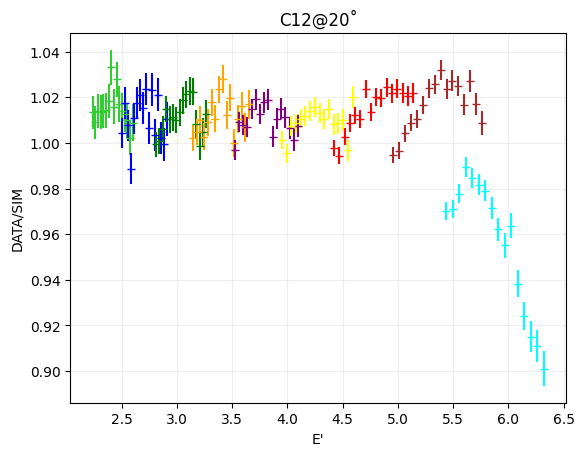

In [12]:
ratio_eprime_2p42_ntg = subtracted_bin_contents_2p42_ntg / bin_counts_eprime_2p42_mc_ntg
ratio_eprime_2p71_ntg = subtracted_bin_contents_2p71_ntg / bin_counts_eprime_2p71_mc_ntg
ratio_eprime_3p04_ntg = subtracted_bin_contents_3p04_ntg / bin_counts_eprime_3p04_mc_ntg
ratio_eprime_3p4_ntg = subtracted_bin_contents_3p4_ntg / bin_counts_eprime_3p4_mc_ntg
ratio_eprime_3p81_ntg = subtracted_bin_contents_3p81_ntg / bin_counts_eprime_3p81_mc_ntg
ratio_eprime_4p27_ntg = subtracted_bin_contents_4p27_ntg / bin_counts_eprime_4p27_mc_ntg
ratio_eprime_4p78_ntg = subtracted_bin_contents_4p78_ntg / bin_counts_eprime_4p78_mc_ntg
ratio_eprime_5p36_ntg = subtracted_bin_contents_5p36_ntg / bin_counts_eprime_5p36_mc_ntg
ratio_eprime_5p878_ntg = subtracted_bin_contents_5p878_ntg / bin_counts_eprime_5p878_mc_ntg
ratio_eprime_6p6_ntg = subtracted_bin_contents_6p6_ntg / bin_counts_eprime_6p6_mc_ntg

# Add errors in quadrature. First is data and second is MC
ratio_errors_2p42_ntg = ratio_eprime_2p42_ntg * np.sqrt((subtracted_bin_errors_2p42_ntg / subtracted_bin_contents_2p42_ntg)**2 + (bin_errors_eprime_2p42_mc_ntg / bin_counts_eprime_2p42_mc_ntg)**2)
ratio_errors_2p71_ntg = ratio_eprime_2p71_ntg * np.sqrt((subtracted_bin_errors_2p71_ntg / subtracted_bin_contents_2p71_ntg)**2 + (bin_errors_eprime_2p71_mc_ntg / bin_counts_eprime_2p71_mc_ntg)**2)
ratio_errors_3p04_ntg = ratio_eprime_3p04_ntg * np.sqrt((subtracted_bin_errors_3p04_ntg / subtracted_bin_contents_3p04_ntg)**2 + (bin_errors_eprime_3p04_mc_ntg / bin_counts_eprime_3p04_mc_ntg)**2)
ratio_errors_3p4_ntg = ratio_eprime_3p4_ntg * np.sqrt((subtracted_bin_errors_3p4_ntg / subtracted_bin_contents_3p4_ntg)**2 + (bin_errors_eprime_3p4_mc_ntg / bin_counts_eprime_3p4_mc_ntg)**2)
ratio_errors_3p81_ntg = ratio_eprime_3p81_ntg * np.sqrt((subtracted_bin_errors_3p81_ntg / subtracted_bin_contents_3p81_ntg)**2 + (bin_errors_eprime_3p81_mc_ntg / bin_counts_eprime_3p81_mc_ntg)**2)
ratio_errors_4p27_ntg = ratio_eprime_4p27_ntg * np.sqrt((subtracted_bin_errors_4p27_ntg / subtracted_bin_contents_4p27_ntg)**2 + (bin_errors_eprime_4p27_mc_ntg / bin_counts_eprime_4p27_mc_ntg)**2)
ratio_errors_4p78_ntg = ratio_eprime_4p78_ntg * np.sqrt((subtracted_bin_errors_4p78_ntg / subtracted_bin_contents_4p78_ntg)**2 + (bin_errors_eprime_4p78_mc_ntg / bin_counts_eprime_4p78_mc_ntg)**2)
ratio_errors_5p36_ntg = ratio_eprime_5p36_ntg * np.sqrt((subtracted_bin_errors_5p36_ntg / subtracted_bin_contents_5p36_ntg)**2 + (bin_errors_eprime_5p36_mc_ntg / bin_counts_eprime_5p36_mc_ntg)**2)
ratio_errors_5p878_ntg = ratio_eprime_5p878_ntg * np.sqrt((subtracted_bin_errors_5p878_ntg / subtracted_bin_contents_5p878_ntg)**2 + (bin_errors_eprime_5p878_mc_ntg / bin_counts_eprime_5p878_mc_ntg)**2)
ratio_errors_6p6_ntg = ratio_eprime_6p6_ntg * np.sqrt((subtracted_bin_errors_6p6_ntg / subtracted_bin_contents_6p6_ntg)**2 + (bin_errors_eprime_6p6_mc_ntg / bin_counts_eprime_6p6_mc_ntg)**2)

fig2, ax2 = plt.subplots()
ax2.errorbar(binned_eprime_bin_centers_2p42, ratio_eprime_2p42_ntg, yerr = ratio_errors_2p42_ntg, fmt = '_', color = 'limegreen', label = '2.42 GeV')
ax2.errorbar(binned_eprime_bin_centers_2p71, ratio_eprime_2p71_ntg, yerr = ratio_errors_2p71_ntg, fmt = '_', color = 'blue', label = '2.71 GeV')
ax2.errorbar(binned_eprime_bin_centers_3p04, ratio_eprime_3p04_ntg, yerr = ratio_errors_3p04_ntg, fmt = '_', color = 'green', label = '3.04 GeV')
ax2.errorbar(binned_eprime_bin_centers_3p4, ratio_eprime_3p4_ntg, yerr = ratio_errors_3p4_ntg, fmt = '_', color = 'orange', label = '3.4 GeV')
ax2.errorbar(binned_eprime_bin_centers_3p81, ratio_eprime_3p81_ntg, yerr = ratio_errors_3p81_ntg, fmt = '_', color = 'purple', label = '3.81 GeV')
ax2.errorbar(binned_eprime_bin_centers_4p27, ratio_eprime_4p27_ntg, yerr = ratio_errors_4p27_ntg, fmt = '_', color = 'yellow', label = '4.27 GeV')
ax2.errorbar(binned_eprime_bin_centers_4p78, ratio_eprime_4p78_ntg, yerr = ratio_errors_4p78_ntg, fmt = '_', color = 'red', label = '4.78 GeV')
ax2.errorbar(binned_eprime_bin_centers_5p36, ratio_eprime_5p36_ntg, yerr = ratio_errors_5p36_ntg, fmt = '_', color = 'brown', label = '5.36 GeV')
ax2.errorbar(binned_eprime_bin_centers_5p878, ratio_eprime_5p878_ntg, yerr = ratio_errors_5p878_ntg, fmt = '_', color = 'cyan', label = '5.878 GeV')
# ax2.errorbar(binned_eprime_bin_centers_6p6, ratio_eprime_6p6_ntg, yerr = ratio_errors_6p6_ntg, fmt = '_', color = 'lightgreen', label = '6.6 GeV')
ax2.set_xlabel('E\'')
ax2.set_ylabel('DATA/SIM')
ax2.set_title(f'{ntg}@{idang}˚')
ax2.grid(alpha = 0.2)
# ax2.set_ylim(0.5, 1.1)
fig2.savefig(f'{folder}/yieldratio_{ntg}_{dang}_{folder}_{start_time:.0f}.pdf')

In [13]:
print(f"bin_counts_eprime_2p42_mc_ntg: {bin_counts_eprime_2p42_mc_ntg}")
print(f"bin_counts_eprime_2p71_mc_ntg: {bin_counts_eprime_2p71_mc_ntg}")
print(f"bin_counts_eprime_3p04_mc_ntg: {bin_counts_eprime_3p04_mc_ntg}")
print(f"bin_counts_eprime_3p4_mc_ntg: {bin_counts_eprime_3p4_mc_ntg}")
print(f"bin_counts_eprime_3p81_mc_ntg: {bin_counts_eprime_3p81_mc_ntg}")
print(f"bin_counts_eprime_4p27_mc_ntg: {bin_counts_eprime_4p27_mc_ntg}")
print(f"bin_counts_eprime_4p78_mc_ntg: {bin_counts_eprime_4p78_mc_ntg}")
print(f"bin_counts_eprime_5p36_mc_ntg: {bin_counts_eprime_5p36_mc_ntg}")
print(f"bin_counts_eprime_5p878_mc_ntg: {bin_counts_eprime_5p878_mc_ntg}")
print(f"bin_counts_eprime_6p6_mc_ntg: {bin_counts_eprime_6p6_mc_ntg}")

bin_counts_eprime_2p42_mc_ntg: [1.84979603 1.80510557 1.7698568  1.75545917 1.7398381  1.72894099
 1.72316835 1.70140367 1.69176624 1.67960354 1.648881   1.63577159
 1.62129541 1.59624759 1.56891894 1.54523307]
bin_counts_eprime_2p71_mc_ntg: [1.77997582 1.72782318 1.7004566  1.68517718 1.67110923 1.64853041
 1.6454262  1.63626932 1.61112191 1.60311106 1.57216428 1.55581576
 1.53498855 1.50920129 1.48656642 1.45482351]
bin_counts_eprime_3p04_mc_ntg: [1.6791263  1.62535934 1.6042029  1.59131489 1.57035204 1.5581603
 1.53964733 1.52545295 1.51163724 1.49280721 1.46760026 1.43971027
 1.41712258 1.39417655 1.36791002 1.34110955]
bin_counts_eprime_3p4_mc_ntg: [1.56537416 1.51654316 1.48821057 1.46427835 1.44722752 1.42192098
 1.41146768 1.39046649 1.36258241 1.34563597 1.31718785 1.29179136
 1.26844023 1.23619547 1.21256077 1.17991979]
bin_counts_eprime_3p81_mc_ntg: [1.40043428 1.3442992  1.31393305 1.28624898 1.26352946 1.23815113
 1.22375017 1.20273973 1.16992116 1.15403054 1.11932128 1.08

In [14]:
# Comparing MC yield with changing delta and acceptance correction
# bin_counts_dc.py

# Define the bin count arrays with '_dc' label
# For Carbon
bin_counts_eprime_2p42_mc_ntg_dc = np.array([
    1.90648039, 1.85617515, 1.81828059, 1.80515044, 1.79162594, 1.77882502,
    1.77475564, 1.75691182, 1.74544664, 1.73885391, 1.70693578, 1.68925751,
    1.67712144, 1.64736018, 1.61730592, 1.58694086
])

bin_counts_eprime_2p71_mc_ntg_dc = np.array([
    1.8191827, 1.76298788, 1.73567454, 1.71700093, 1.70779009, 1.68370727,
    1.68459585, 1.67807215, 1.65461273, 1.64477188, 1.61791797, 1.5969982,
    1.57620486, 1.54952743, 1.52221157, 1.48540295
])

bin_counts_eprime_3p04_mc_ntg_dc = np.array([
    1.70557875, 1.64803768, 1.62546454, 1.61293721, 1.59466801, 1.58090282,
    1.56846385, 1.55264993, 1.54357529, 1.52359547, 1.49851869, 1.47317237,
    1.446607, 1.42245028, 1.39297845, 1.36146826
])

bin_counts_eprime_3p4_mc_ntg_dc = np.array([
    1.58122057, 1.52816193, 1.50017389, 1.47772348, 1.46063994, 1.43567292,
    1.42713599, 1.40899592, 1.38333627, 1.36707105, 1.3350422, 1.3130063,
    1.2892761, 1.25403394, 1.22708003, 1.19072839
])

bin_counts_eprime_3p81_mc_ntg_dc = np.array([
    1.40632711, 1.34745114, 1.31519977, 1.2892237, 1.26873903, 1.24103925,
    1.23020378, 1.21101306, 1.17982503, 1.16386561, 1.1295259, 1.09676196,
    1.05874433, 1.02657545, 0.99645684, 0.95867039
])

bin_counts_eprime_4p27_mc_ntg_dc = np.array([
    1.16127394, 1.11377667, 1.06649299, 1.04495509, 1.01639886, 0.98962193,
    0.96174097, 0.93250664, 0.9043164, 0.87366771, 0.84594814, 0.80839016,
    0.77639777, 0.73999499, 0.70863488, 0.6681083
])

bin_counts_eprime_4p78_mc_ntg_dc = np.array([
    0.86376684, 0.81136902, 0.77438776, 0.73860445, 0.70525785, 0.6753283,
    0.64272094, 0.61795689, 0.58755548, 0.55381313, 0.52249062, 0.49174443,
    0.45905235, 0.43002208, 0.40001991, 0.37196636
])

bin_counts_eprime_5p36_mc_ntg_dc = np.array([
    0.51616861, 0.47330159, 0.43740241, 0.40797545, 0.3805292, 0.35180585,
    0.32662122, 0.3016921, 0.27643348, 0.25382787, 0.23043059, 0.20901076,
    0.18774044, 0.16658535, 0.14840478, 0.13147243
])

bin_counts_eprime_5p878_mc_ntg_dc = np.array([
    0.26643876, 0.23724785, 0.21080281, 0.18692677, 0.1674054, 0.14915415,
    0.13143583, 0.11533, 0.10033362, 0.08605071, 0.07303485, 0.06224286,
    0.0520706, 0.04278634, 0.03476392, 0.02808894
])

bin_counts_eprime_6p6_mc_ntg_dc = np.array([
    0.06092537, 0.04896286, 0.03887389, 0.03102496, 0.0241254, 0.01861271,
    0.0141402, 0.01067187, 0.00784376, 0.00564149, 0.00405829, 0.00280435,
    0.00191802, 0.00127436, 0.00081774, 0.00050981
])

ratio_acdcmc_2p42 = bin_counts_eprime_2p42_mc_ntg / bin_counts_eprime_2p42_mc_ntg_dc
ratio_acdcmc_2p71 = bin_counts_eprime_2p71_mc_ntg / bin_counts_eprime_2p71_mc_ntg_dc
ratio_acdcmc_3p04 = bin_counts_eprime_3p04_mc_ntg / bin_counts_eprime_3p04_mc_ntg_dc
ratio_acdcmc_3p4 = bin_counts_eprime_3p4_mc_ntg / bin_counts_eprime_3p4_mc_ntg_dc
ratio_acdcmc_3p81 = bin_counts_eprime_3p81_mc_ntg / bin_counts_eprime_3p81_mc_ntg_dc
ratio_acdcmc_4p27 = bin_counts_eprime_4p27_mc_ntg / bin_counts_eprime_4p27_mc_ntg_dc
ratio_acdcmc_4p78 = bin_counts_eprime_4p78_mc_ntg / bin_counts_eprime_4p78_mc_ntg_dc
ratio_acdcmc_5p36 = bin_counts_eprime_5p36_mc_ntg / bin_counts_eprime_5p36_mc_ntg_dc
ratio_acdcmc_5p878 = bin_counts_eprime_5p878_mc_ntg / bin_counts_eprime_5p878_mc_ntg_dc
ratio_acdcmc_6p6 = bin_counts_eprime_6p6_mc_ntg / bin_counts_eprime_6p6_mc_ntg_dc

delta = np.linspace(-8, 8, 16)
# plt.plot(delta, ratio_acdcmc_2p42, label = '2.42', color = 'limegreen')
# plt.plot(delta, ratio_acdcmc_2p71, label = '2.71', color = 'blue')
# plt.plot(delta, ratio_acdcmc_3p04, label = '3.04', color = 'green')
# plt.plot(delta, ratio_acdcmc_3p4, label = '3.4', color = 'orange')
# plt.plot(delta, ratio_acdcmc_3p81, label = '3.81', color = 'purple')
# plt.plot(delta, ratio_acdcmc_4p27, label = '4.27', color = 'yellow')
# plt.plot(delta, ratio_acdcmc_4p78, label = '4.78', color = 'red')
# plt.plot(delta, ratio_acdcmc_5p36, label = '5.36', color = 'brown')
# plt.xlabel(r'$\delta$')
# plt.ylabel('Acceptance Correction / Changing Delta')
# plt.title(f'{ntg}@{dang}˚ MC Yield')
# plt.legend()
# plt.grid(alpha = 0.2)
# plt.savefig(f'{folder}/acdcmc_{ntg}_{dang}_{start_time:.0f}.pdf')

<h1 align="center">BORN CROSS SECTION CALCULATION FOR NTG</h1>


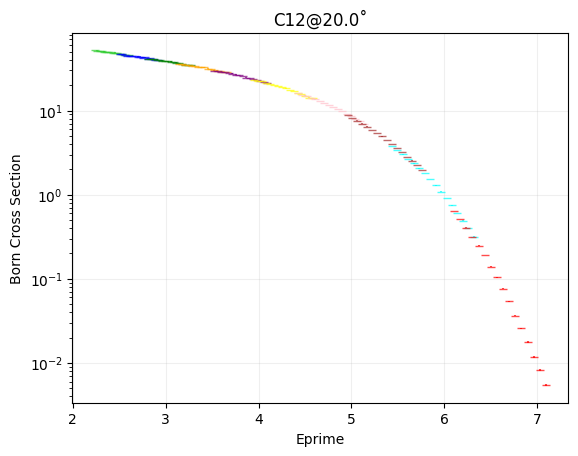

In [15]:
# Get points to interpolate based on angle and E'. Common for ntg and dtg
points_to_interpolate_2p42 = np.column_stack((binned_eprime_bin_centers_2p42, np.full(len(binned_eprime_bin_centers_2p42), dang)))
points_to_interpolate_2p71 = np.column_stack((binned_eprime_bin_centers_2p71, np.full(len(binned_eprime_bin_centers_2p71), dang)))
points_to_interpolate_3p04 = np.column_stack((binned_eprime_bin_centers_3p04, np.full(len(binned_eprime_bin_centers_3p04), dang)))
points_to_interpolate_3p4 = np.column_stack((binned_eprime_bin_centers_3p4, np.full(len(binned_eprime_bin_centers_3p4), dang)))
points_to_interpolate_3p81 = np.column_stack((binned_eprime_bin_centers_3p81, np.full(len(binned_eprime_bin_centers_3p81), dang)))
points_to_interpolate_4p27 = np.column_stack((binned_eprime_bin_centers_4p27, np.full(len(binned_eprime_bin_centers_4p27), dang)))
points_to_interpolate_4p78 = np.column_stack((binned_eprime_bin_centers_4p78, np.full(len(binned_eprime_bin_centers_4p78), dang)))
points_to_interpolate_5p36 = np.column_stack((binned_eprime_bin_centers_5p36, np.full(len(binned_eprime_bin_centers_5p36), dang)))
points_to_interpolate_5p878 = np.column_stack((binned_eprime_bin_centers_5p878, np.full(len(binned_eprime_bin_centers_5p878), dang)))
points_to_interpolate_6p6 = np.column_stack((binned_eprime_bin_centers_6p6, np.full(len(binned_eprime_bin_centers_6p6), dang)))

# Interpolate again to get model Born cross-section
born_xsec_array_2p42_ntg = griddata(points_ntg, V6, points_to_interpolate_2p42, method = 'linear') # points is just the whole stack of 2D array of [E', theta] from the table
born_xsec_array_2p71_ntg = griddata(points_ntg, V6, points_to_interpolate_2p71, method = 'linear')
born_xsec_array_3p04_ntg = griddata(points_ntg, V6, points_to_interpolate_3p04, method = 'linear')
born_xsec_array_3p4_ntg = griddata(points_ntg, V6, points_to_interpolate_3p4, method = 'linear')
born_xsec_array_3p81_ntg = griddata(points_ntg, V6, points_to_interpolate_3p81, method = 'linear')
born_xsec_array_4p27_ntg = griddata(points_ntg, V6, points_to_interpolate_4p27, method = 'linear')
born_xsec_array_4p78_ntg = griddata(points_ntg, V6, points_to_interpolate_4p78, method = 'linear')
born_xsec_array_5p36_ntg = griddata(points_ntg, V6, points_to_interpolate_5p36, method = 'linear')
born_xsec_array_5p878_ntg = griddata(points_ntg, V6, points_to_interpolate_5p878, method = 'linear')
born_xsec_array_6p6_ntg = griddata(points_ntg, V6, points_to_interpolate_6p6, method = 'linear')
# print("Length of born_xsec_array", len(born_xsec_array))

# Get the QE piece
qe_array_2p42_ntg = griddata(points_ntg, V8, points_to_interpolate_2p42, method = 'linear')
qe_array_2p71_ntg = griddata(points_ntg, V8, points_to_interpolate_2p71, method = 'linear')
qe_array_3p04_ntg = griddata(points_ntg, V8, points_to_interpolate_3p04, method = 'linear')
qe_array_3p4_ntg = griddata(points_ntg, V8, points_to_interpolate_3p4, method = 'linear')
qe_array_3p81_ntg = griddata(points_ntg, V8, points_to_interpolate_3p81, method = 'linear')
qe_array_4p27_ntg = griddata(points_ntg, V8, points_to_interpolate_4p27, method = 'linear')
qe_array_4p78_ntg = griddata(points_ntg, V8, points_to_interpolate_4p78, method = 'linear')
qe_array_5p36_ntg = griddata(points_ntg, V8, points_to_interpolate_5p36, method = 'linear')
qe_array_5p878_ntg = griddata(points_ntg, V8, points_to_interpolate_5p878, method = 'linear')
qe_array_6p6_ntg = griddata(points_ntg, V8, points_to_interpolate_6p6, method = 'linear')

# Interpolate 3rd time to get Coulomb correction factor
ccf_2p42_ntg = griddata(points_ntg, V13, points_to_interpolate_2p42, method = 'linear')
ccf_2p71_ntg = griddata(points_ntg, V13, points_to_interpolate_2p71, method = 'linear')
ccf_3p04_ntg = griddata(points_ntg, V13, points_to_interpolate_3p04, method = 'linear')
ccf_3p4_ntg = griddata(points_ntg, V13, points_to_interpolate_3p4, method = 'linear')
ccf_3p81_ntg = griddata(points_ntg, V13, points_to_interpolate_3p81, method = 'linear')
ccf_4p27_ntg = griddata(points_ntg, V13, points_to_interpolate_4p27, method = 'linear')
ccf_4p78_ntg = griddata(points_ntg, V13, points_to_interpolate_4p78, method = 'linear')
ccf_5p36_ntg = griddata(points_ntg, V13, points_to_interpolate_5p36, method = 'linear')
ccf_5p878_ntg = griddata(points_ntg, V13, points_to_interpolate_5p878, method = 'linear')
ccf_6p6_ntg = griddata(points_ntg, V13, points_to_interpolate_6p6, method = 'linear')

fig3, ax3 = plt.subplots()
# Calculate the data Born cross-section and apply Coloumb corrections
born_cross_2p42_ntg = ratio_eprime_2p42_ntg * born_xsec_array_2p42_ntg * ccf_2p42_ntg
born_cross_2p71_ntg = ratio_eprime_2p71_ntg * born_xsec_array_2p71_ntg * ccf_2p71_ntg
born_cross_3p04_ntg = ratio_eprime_3p04_ntg * born_xsec_array_3p04_ntg * ccf_3p04_ntg
born_cross_3p4_ntg= ratio_eprime_3p4_ntg * born_xsec_array_3p4_ntg * ccf_3p4_ntg
born_cross_3p81_ntg = ratio_eprime_3p81_ntg * born_xsec_array_3p81_ntg * ccf_3p81_ntg
born_cross_4p27_ntg = ratio_eprime_4p27_ntg * born_xsec_array_4p27_ntg * ccf_4p27_ntg
born_cross_4p78_ntg = ratio_eprime_4p78_ntg * born_xsec_array_4p78_ntg * ccf_4p78_ntg
born_cross_5p36_ntg = ratio_eprime_5p36_ntg * born_xsec_array_5p36_ntg * ccf_5p36_ntg
born_cross_5p878_ntg = ratio_eprime_5p878_ntg * born_xsec_array_5p878_ntg * ccf_5p878_ntg
born_cross_6p6_ntg= ratio_eprime_6p6_ntg * born_xsec_array_6p6_ntg * ccf_6p6_ntg

# print("Length of born_cross", len(born_cross))
# print("Born cross section", born_cross)
born_errors_2p42_ntg = born_cross_2p42_ntg * ratio_errors_2p42_ntg
born_errors_2p71_ntg = born_cross_2p71_ntg * ratio_errors_2p71_ntg
born_errors_3p04_ntg = born_cross_3p04_ntg * ratio_errors_3p04_ntg
born_errors_3p4_ntg = born_cross_3p4_ntg * ratio_errors_3p4_ntg
born_errors_3p81_ntg = born_cross_3p81_ntg * ratio_errors_3p81_ntg
born_errors_4p27_ntg = born_cross_4p27_ntg * ratio_errors_4p27_ntg
born_errors_4p78_ntg = born_cross_4p78_ntg * ratio_errors_4p78_ntg
born_errors_5p36_ntg = born_cross_5p36_ntg * ratio_errors_5p36_ntg
born_errors_5p878_ntg = born_cross_5p878_ntg * ratio_errors_5p878_ntg
born_errors_6p6_ntg = born_cross_6p6_ntg * ratio_errors_6p6_ntg

ax3.errorbar(binned_eprime_bin_centers_2p42, born_cross_2p42_ntg, yerr = born_errors_2p42_ntg, fmt = '_', alpha = 0.7, color = 'limegreen', label = '2.42 GeV')
ax3.errorbar(binned_eprime_bin_centers_2p71, born_cross_2p71_ntg, yerr = born_errors_2p71_ntg, fmt = '_', alpha = 0.7, color = 'blue', label = '2.71 GeV')
ax3.errorbar(binned_eprime_bin_centers_3p04, born_cross_3p04_ntg, yerr = born_errors_3p04_ntg, fmt = '_', alpha = 0.7, color = 'green', label = '3.04 GeV')
ax3.errorbar(binned_eprime_bin_centers_3p4, born_cross_3p4_ntg, yerr = born_errors_3p4_ntg, fmt = '_', alpha = 0.7, color = 'orange', label = '3.4 GeV')
ax3.errorbar(binned_eprime_bin_centers_3p81, born_cross_3p81_ntg, yerr = born_errors_3p81_ntg, fmt = '_', alpha = 0.7, color = 'purple', label = '3.81 GeV')
ax3.errorbar(binned_eprime_bin_centers_4p27, born_cross_4p27_ntg, yerr = born_errors_4p27_ntg, fmt = '_', alpha = 0.7, color = 'yellow', label = '4.27 GeV')
ax3.errorbar(binned_eprime_bin_centers_4p78, born_cross_4p78_ntg, yerr = born_errors_4p78_ntg, fmt = '_', alpha = 0.7, color = 'pink', label = '4.78 GeV')
ax3.errorbar(binned_eprime_bin_centers_5p36, born_cross_5p36_ntg, yerr = born_errors_5p36_ntg, fmt = '_', alpha = 0.7, color = 'brown', label = '5.36 GeV')
ax3.errorbar(binned_eprime_bin_centers_5p878, born_cross_5p878_ntg, yerr = born_errors_5p878_ntg, fmt = '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
ax3.errorbar(binned_eprime_bin_centers_6p6, born_cross_6p6_ntg, yerr = born_errors_6p6_ntg, fmt = '_', alpha = 0.7, color = 'red', label = '6.6 GeV')
ax3.set_xlabel('Eprime')
ax3.set_ylabel('Born Cross Section')
ax3.set_title(f'{ntg}@{dang}˚')
ax3.set_yscale('log')
#ax3.legend()
ax3.grid(alpha = 0.2)
# fig3.savefig(f'{folder}/xsec_{ntg}_{dang}_{start_time:.0f}.pdf')

<h1 align="center">DATA WORK FOR DUMMY TARGET</h1>


Mean scaling factor for Dummy at 2.42 GeV/c is 0.00017826338282888438
Total scaling factor for Dummy at 2.42 GeV/c is 11219.354015736404
Scaling factor for Dummy at 2.42 GeV/c is 8.913169141444219e-05
Counts for Dummy at 2.42 GeV is 16806
Mean scaling factor for Dummy at 2.71 GeV/c is 7.493694636011763e-05
Total scaling factor for Dummy at 2.71 GeV/c is 13344.552301269276
Scaling factor for Dummy at 2.71 GeV/c is 7.493694636011763e-05
Counts for Dummy at 2.71 GeV is 18483
Mean scaling factor for Dummy at 3.04 GeV/c is 3.108452271062274e-05
Total scaling factor for Dummy at 3.04 GeV/c is 32170.350798349646
Scaling factor for Dummy at 3.04 GeV/c is 3.108452271062274e-05
Counts for Dummy at 3.04 GeV is 41201
Mean scaling factor for Dummy at 3.4 GeV/c is 2.1846282191674654e-05
Total scaling factor for Dummy at 3.4 GeV/c is 45774.378964173935
Scaling factor for Dummy at 3.4 GeV/c is 2.1846282191674654e-05
Counts for Dummy at 3.4 GeV is 53660
Mean scaling factor for Dummy at 3.81 GeV/c is 4.

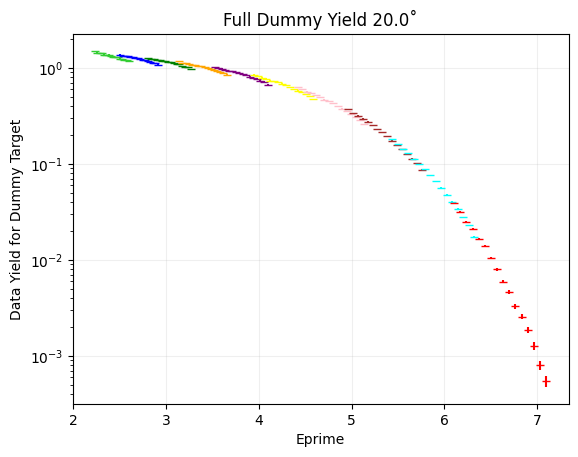

In [16]:
Z, A = 13, 27 # Target
Eu = 0.19535 # Ratio of upstream dummy to target cell thickness
Ed = 0.23924 # Ratio of downstream dummy to target cell thickness
ytar_hist = {}

for momentum in dmom:
    # Get the runs where data for Dummy target was taken
    files = [f'/Volumes/smriti/xem2/ROOTfiles/HMS_{run}_skim.root' for run in Dummy_dict[momentum]]
    # Grab relevant bracnhes. ytar needed for upstream/downstream differentiation
    branches = ['H_gtr_dp', 'H_cal_etottracknorm', 'H_gtr_ph', 'H_gtr_th', 'H_cer_npeSum', 'H_bcm_CurrentFlag', 'H_gtr_y']
    electrons = uproot.concatenate(files, branches)

    data_cut = (np.abs(electrons['H_gtr_dp']) < 8) & (electrons['H_cal_etottracknorm'] > 0.7) & (np.abs(electrons['H_gtr_ph']) < 0.032) & (np.abs(electrons['H_gtr_th']) < 0.085) & (electrons['H_cer_npeSum'] > 2) & (electrons['H_bcm_CurrentFlag'] == 1)
    dp_cut = electrons['H_gtr_dp'][data_cut]
    theta_cut = electrons['H_gtr_th'][data_cut]
    phi_cut = electrons['H_gtr_ph'][data_cut]
    y_cut = electrons['H_gtr_y'][data_cut]

    theta_dict[momentum] = np.rad2deg(np.arccos((cos_ts + phi_cut * sin_ts)/np.sqrt(1 + theta_cut * theta_cut + phi_cut * phi_cut)))
    delta_hist[momentum] = np.array(dp_cut)
    ytar_hist[momentum] = np.array(y_cut)

dummy_eprime_bin_contents_2p42, dummy_eprime_bin_errors_2p42 = datahist_from_array(delta_hist[2.42], 2.42, hsdelta_binedges, ald)
dummy_eprime_bin_contents_2p71, dummy_eprime_bin_errors_2p71 = datahist_from_array(delta_hist[2.71], 2.71, hsdelta_binedges, ald)
dummy_eprime_bin_contents_3p04, dummy_eprime_bin_errors_3p04 = datahist_from_array(delta_hist[3.04], 3.04, hsdelta_binedges, ald)
dummy_eprime_bin_contents_3p4, dummy_eprime_bin_errors_3p4 = datahist_from_array(delta_hist[3.4], 3.4, hsdelta_binedges, ald)
dummy_eprime_bin_contents_3p81, dummy_eprime_bin_errors_3p81 = datahist_from_array(delta_hist[3.81], 3.81, hsdelta_binedges, ald)
dummy_eprime_bin_contents_4p27, dummy_eprime_bin_errors_4p27 = datahist_from_array(delta_hist[4.27], 4.27, hsdelta_binedges, ald)
dummy_eprime_bin_contents_4p78, dummy_eprime_bin_errors_4p78 = datahist_from_array(delta_hist[4.78], 4.78, hsdelta_binedges, ald)
dummy_eprime_bin_contents_5p36, dummy_eprime_bin_errors_5p36 = datahist_from_array(delta_hist[5.36], 5.36, hsdelta_binedges, ald)
dummy_eprime_bin_contents_5p878, dummy_eprime_bin_errors_5p878 = datahist_from_array(delta_hist[5.878], 5.878, hsdelta_binedges, ald)
dummy_eprime_bin_contents_6p6, dummy_eprime_bin_errors_6p6 = datahist_from_array(delta_hist[6.6], 6.6, hsdelta_binedges, ald)

plt.errorbar(binned_eprime_bin_centers_2p42, dummy_eprime_bin_contents_2p42, yerr = dummy_eprime_bin_errors_2p42, fmt = '_', label = '2.42 GeV', color = 'limegreen')
plt.errorbar(binned_eprime_bin_centers_2p71, dummy_eprime_bin_contents_2p71, yerr = dummy_eprime_bin_errors_2p71, fmt = '_', label = '2.71 GeV', color = 'blue')
plt.errorbar(binned_eprime_bin_centers_3p04, dummy_eprime_bin_contents_3p04, yerr = dummy_eprime_bin_errors_3p04, fmt = '_', label = '3.04 GeV', color = 'green')
plt.errorbar(binned_eprime_bin_centers_3p4, dummy_eprime_bin_contents_3p4, yerr = dummy_eprime_bin_errors_3p4, fmt = '_', label = '3.4 GeV', color = 'orange')
plt.errorbar(binned_eprime_bin_centers_3p81, dummy_eprime_bin_contents_3p81, yerr = dummy_eprime_bin_errors_3p81, fmt = '_', label = '3.81 GeV', color = 'purple')
plt.errorbar(binned_eprime_bin_centers_4p27, dummy_eprime_bin_contents_4p27, yerr = dummy_eprime_bin_errors_4p27, fmt = '_', label = '4.27 GeV', color = 'yellow')
plt.errorbar(binned_eprime_bin_centers_4p78, dummy_eprime_bin_contents_4p78, yerr = dummy_eprime_bin_errors_4p78, fmt = '_', label = '4.78 GeV', color = 'pink')
plt.errorbar(binned_eprime_bin_centers_5p36, dummy_eprime_bin_contents_5p36, yerr = dummy_eprime_bin_errors_5p36, fmt = '_', label = '5.36 GeV', color = 'brown')
plt.errorbar(binned_eprime_bin_centers_5p878, dummy_eprime_bin_contents_5p878, yerr = dummy_eprime_bin_errors_5p878, fmt = '_', label = '5.878 GeV', color = 'cyan')
plt.errorbar(binned_eprime_bin_centers_6p6, dummy_eprime_bin_contents_6p6, yerr = dummy_eprime_bin_errors_6p6, fmt = '_', label = '6.6 GeV', color = 'red')
plt.grid(alpha = 0.2)
plt.xlabel('Eprime')
plt.ylabel('Data Yield for Dummy Target')
plt.title(f'Full {ald} Yield {dang}˚')
plt.yscale('log')

In [17]:
print(f"{dummy_eprime_bin_contents_4p27}")
print(dummy_eprime_bin_contents_2p42)

[0.85442931 0.81691357 0.79373938 0.77748974 0.73960469 0.73391117
 0.70990602 0.68691648 0.66149564 0.63401283 0.60483734 0.58320194
 0.56175119 0.53248337 0.5076165  0.47416318]
[1.49794721 1.44464645 1.43796158 1.42067003 1.38439343 1.37039976
 1.37476721 1.34954294 1.31807945 1.30774018 1.30319446 1.25479595
 1.24392189 1.22226288 1.21031924 1.17395351]


<h1 align="center">DATA WORK FOR DTG</h1>

In [18]:
# Kinematic variables
Z, A = target_info[dtg][0], target_info[dtg][1]  # Target
thick = target_info[dtg][2] # g/cm2. From Cameron's target sheet column 'R'
thick = thick * 0.996 # Cryo target contraction correction factor
lumin = thick * sim_charge / A * N_A / Q_E * 1e-39
ytar = {}
dtrack_hist = {}
ytar_hist = {}
for momentum in dmom:
    files = [f'/Volumes/smriti/xem2/ROOTfiles/HMS_{run}_skim.root' for run in LD2_dict[momentum]]
    branches = ['H_gtr_dp', 'H_cal_etottracknorm', 'H_gtr_ph', 'H_gtr_th', 'H_cer_npeSum', 'H_bcm_CurrentFlag', 'H_dc_ntrack']
    electrons = uproot.concatenate(files, branches)

    data_cut = (np.abs(electrons['H_gtr_dp']) < 8) & (electrons['H_cal_etottracknorm'] > 0.7) & (np.abs(electrons['H_gtr_ph']) < 0.032) & (np.abs(electrons['H_gtr_th']) < 0.085) & (electrons['H_cer_npeSum'] > 2) & (electrons['H_bcm_CurrentFlag'] == 1)
    dp_cut = electrons['H_gtr_dp'][data_cut]
    dtrack_hist[momentum] = electrons['H_dc_ntrack'][data_cut]
    delta_hist[momentum] = np.array(dp_cut)

eprime_bin_contents_2p42_dtg, eprime_bin_errors_2p42_dtg = datahist_from_array(delta_hist[2.42], 2.42, data_delta, dtg)
eprime_bin_contents_2p71_dtg, eprime_bin_errors_2p71_dtg = datahist_from_array(delta_hist[2.71], 2.71, data_delta, dtg)
eprime_bin_contents_3p04_dtg, eprime_bin_errors_3p04_dtg = datahist_from_array(delta_hist[3.04], 3.04, data_delta, dtg)
eprime_bin_contents_3p4_dtg, eprime_bin_errors_3p4_dtg = datahist_from_array(delta_hist[3.4], 3.4, data_delta, dtg)
eprime_bin_contents_3p81_dtg, eprime_bin_errors_3p81_dtg = datahist_from_array(delta_hist[3.81], 3.81, data_delta, dtg)
eprime_bin_contents_4p27_dtg, eprime_bin_errors_4p27_dtg = datahist_from_array(delta_hist[4.27], 4.27, data_delta, dtg)
eprime_bin_contents_4p78_dtg, eprime_bin_errors_4p78_dtg = datahist_from_array(delta_hist[4.78], 4.78, data_delta, dtg)
eprime_bin_contents_5p36_dtg, eprime_bin_errors_5p36_dtg = datahist_from_array(delta_hist[5.36], 5.36, data_delta, dtg)
eprime_bin_contents_5p878_dtg, eprime_bin_errors_5p878_dtg = datahist_from_array(delta_hist[5.878], 5.878, data_delta, dtg)
eprime_bin_contents_6p6_dtg, eprime_bin_errors_6p6_dtg = datahist_from_array(delta_hist[6.6], 6.6, data_delta, dtg)

Target boiling correction not applied for cryo target LD2
Mean scaling factor for LD2 at 2.42 GeV/c is 0.0011319916446440499
Total scaling factor for LD2 at 2.42 GeV/c is 1766.7974931289282
Scaling factor for LD2 at 2.42 GeV/c is 0.0005659958223220249
Counts for LD2 at 2.42 GeV is 10005
Target boiling correction not applied for cryo target LD2
Mean scaling factor for LD2 at 2.71 GeV/c is 0.0002825141761530963
Total scaling factor for LD2 at 2.71 GeV/c is 7079.290771292789
Scaling factor for LD2 at 2.71 GeV/c is 0.00014125708807654816
Counts for LD2 at 2.71 GeV is 37894
Target boiling correction not applied for cryo target LD2
Mean scaling factor for LD2 at 3.04 GeV/c is 0.00028169864256205666
Total scaling factor for LD2 at 3.04 GeV/c is 7099.785720690546
Scaling factor for LD2 at 3.04 GeV/c is 0.00014084932128102833
Counts for LD2 at 3.04 GeV is 35109
Target boiling correction not applied for cryo target LD2
Mean scaling factor for LD2 at 3.4 GeV/c is 0.00013783006018062868
Total scal

1.0 50.0


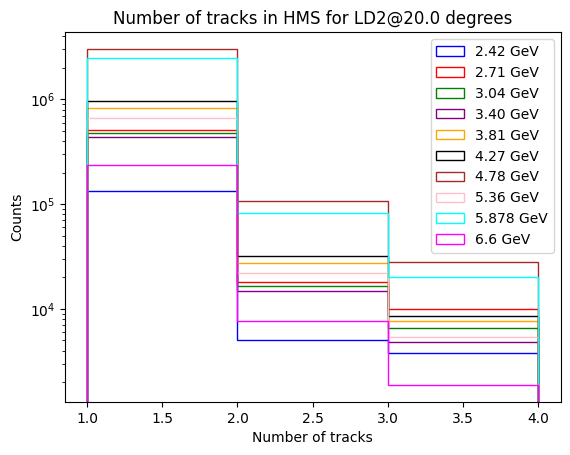

In [19]:
plt.hist(dtrack_hist[2.42], bins = range(1, 5), histtype = 'step', label = '2.42 GeV', color = 'blue')
plt.hist(dtrack_hist[2.71], bins = range(1, 5), histtype = 'step', label = '2.71 GeV', color = 'red')
plt.hist(dtrack_hist[3.04], bins = range(1, 5), histtype = 'step', label = '3.04 GeV', color = 'green')
plt.hist(dtrack_hist[3.40], bins = range(1, 5), histtype = 'step', label = '3.40 GeV', color = 'purple')
plt.hist(dtrack_hist[3.81], bins = range(1, 5), histtype = 'step', label = '3.81 GeV', color = 'orange')
plt.hist(dtrack_hist[4.27], bins = range(1, 5), histtype = 'step', label = '4.27 GeV', color = 'black')
plt.hist(dtrack_hist[4.78], bins = range(1, 5), histtype = 'step', label = '4.78 GeV', color = 'brown')
plt.hist(dtrack_hist[5.36], bins = range(1, 5), histtype = 'step', label = '5.36 GeV', color = 'pink')
plt.hist(dtrack_hist[5.878], bins = range(1, 5), histtype = 'step', label = '5.878 GeV', color = 'cyan')
plt.hist(dtrack_hist[6.6], bins = range(1, 5), histtype = 'step', label = '6.6 GeV', color = 'magenta')
plt.yscale('log')
plt.legend()
plt.ylabel('Counts')
plt.xlabel('Number of tracks')
plt.title(f'Number of tracks in HMS for {dtg}@{dang} degrees')
# plt.savefig(f'{folder}/track_hist_{time.time():.0f}.pdf')
min = np.min(track_hist[2.42])
bada = np.max(track_hist[2.42])
print(min, bada)

In [20]:
k = 0
ot = 0
for mom in dmom:
    for i in dtrack_hist[mom]:
        if i > 1:
            k += 1
        else:
            ot += 1
    print(f'Percentage of tracks for {mom}GeV with more than 1 hit: {(k/ot) * 100:.2f}%')

Percentage of tracks for 2.42GeV with more than 1 hit: 7.17%
Percentage of tracks for 2.71GeV with more than 1 hit: 6.22%
Percentage of tracks for 3.04GeV with more than 1 hit: 5.77%
Percentage of tracks for 3.4GeV with more than 1 hit: 5.48%
Percentage of tracks for 3.81GeV with more than 1 hit: 5.15%
Percentage of tracks for 4.27GeV with more than 1 hit: 4.92%
Percentage of tracks for 4.78GeV with more than 1 hit: 4.80%
Percentage of tracks for 5.36GeV with more than 1 hit: 4.75%
Percentage of tracks for 5.878GeV with more than 1 hit: 4.63%
Percentage of tracks for 6.6GeV with more than 1 hit: 4.63%


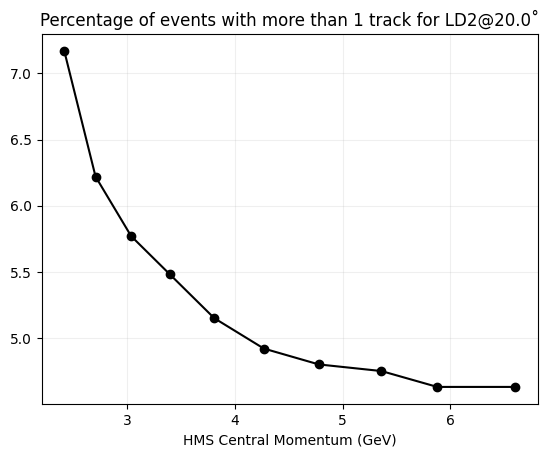

In [21]:
percentages = [7.17, 6.22, 5.77, 5.48, 5.15, 4.92, 4.80, 4.75, 4.63, 4.63]
plt.plot(dmom, percentages, marker = 'o', color = 'black')
plt.xlabel('HMS Central Momentum (GeV)')
plt.title(f'Percentage of events with more than 1 track for {dtg}@{dang}˚')
plt.grid(alpha = 0.2)
# plt.savefig(f'{folder}/track_percentage_{time.time():.0f}.pdf')

[5.6627882  5.55864497 5.4731796  5.38884622 5.37356434 5.42110799
 5.10528232 5.16018391 5.13924207 5.01132701 4.97680127 4.8234164
 4.70342528 4.65757962 4.54041849 4.58683014]
[0.12894914 0.10109769 0.07835307 0.06116556 0.04721568 0.03628157
 0.02680373 0.02011982 0.01407948 0.00919889 0.00605571 0.0036264
 0.00215695 0.00130691 0.00085224 0.00055351]


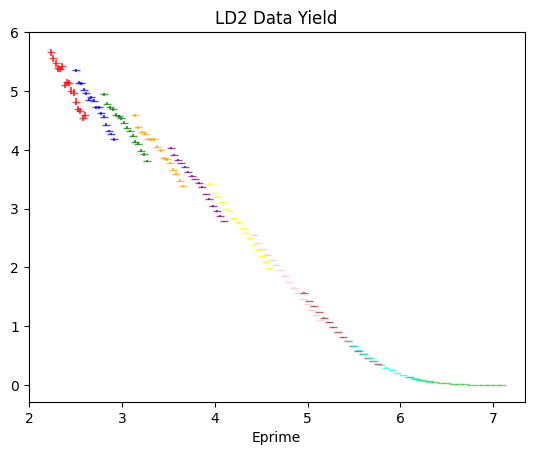

In [22]:
fig3, ax3 = plt.subplots()
ax3.errorbar(binned_eprime_bin_centers_2p42, eprime_bin_contents_2p42_dtg, yerr = eprime_bin_errors_2p42_dtg, fmt = '_', color = 'red', alpha = 0.7, label = '2.42 GeV')
ax3.errorbar(binned_eprime_bin_centers_2p71, eprime_bin_contents_2p71_dtg, yerr = eprime_bin_errors_2p71_dtg, fmt = '_', color = 'blue', alpha = 0.7, label = '2.71 GeV')
ax3.errorbar(binned_eprime_bin_centers_3p04, eprime_bin_contents_3p04_dtg, yerr = eprime_bin_errors_3p04_dtg, fmt = '_', color = 'green', alpha = 0.7, label = '3.04 GeV')
ax3.errorbar(binned_eprime_bin_centers_3p4, eprime_bin_contents_3p4_dtg, yerr = eprime_bin_errors_3p4_dtg, fmt = '_', color = 'orange', alpha = 0.7, label = '3.4 GeV')
ax3.errorbar(binned_eprime_bin_centers_3p81, eprime_bin_contents_3p81_dtg, yerr = eprime_bin_errors_3p81_dtg, fmt = '_', color = 'purple', alpha = 0.7, label = '3.81 GeV')
ax3.errorbar(binned_eprime_bin_centers_4p27, eprime_bin_contents_4p27_dtg, yerr = eprime_bin_errors_4p27_dtg, fmt = '_', color = 'yellow', alpha = 0.7, label = '4.27 GeV')
ax3.errorbar(binned_eprime_bin_centers_4p78, eprime_bin_contents_4p78_dtg, yerr = eprime_bin_errors_4p78_dtg, fmt = '_', color = 'pink', alpha = 0.7, label = '4.78 GeV')
ax3.errorbar(binned_eprime_bin_centers_5p36, eprime_bin_contents_5p36_dtg, yerr = eprime_bin_errors_5p36_dtg, fmt = '_', color = 'brown', alpha = 0.7, label = '5.36 GeV')
ax3.errorbar(binned_eprime_bin_centers_5p878, eprime_bin_contents_5p878_dtg, yerr = eprime_bin_errors_5p878_dtg, fmt = '_', color = 'cyan', alpha = 0.7, label = '5.878 GeV')
ax3.errorbar(binned_eprime_bin_centers_6p6, eprime_bin_contents_6p6_dtg, yerr = eprime_bin_errors_6p6_dtg, fmt = '_', color = 'limegreen', alpha = 0.7, label = '6.6 GeV')
ax3.set_xlabel('Eprime')
ax3.set_title('LD2 Data Yield')
print(eprime_bin_contents_2p42_dtg)
print(eprime_bin_contents_6p6_dtg)

<h2 style="text-align: center; color: silver">Subtracting CSB from full cryo target yield and dummy</h2>

Text(0.5, 1.0, 'Dummy Subtracted LD2 Data Yield')

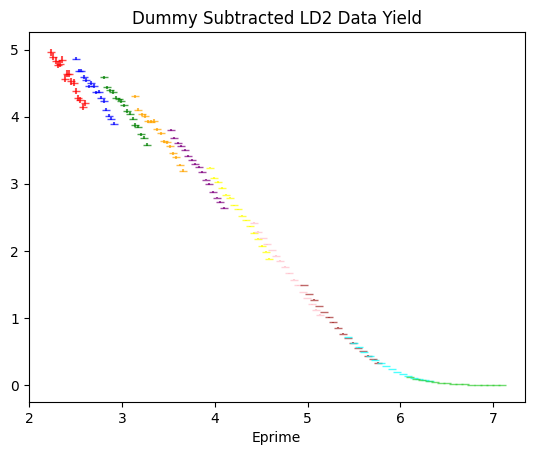

In [23]:
# Calculate the charge symmetric background fraction per bin for full cryo target
csb_frac_2p42_dtg = csb(binned_eprime_bin_centers_2p42, dtg, dang)
csb_frac_2p71_dtg = csb(binned_eprime_bin_centers_2p71, dtg, dang)
csb_frac_3p04_dtg = csb(binned_eprime_bin_centers_3p04, dtg, dang)
csb_frac_3p4_dtg = csb(binned_eprime_bin_centers_3p4, dtg, dang)
csb_frac_3p81_dtg = csb(binned_eprime_bin_centers_3p81, dtg, dang)
csb_frac_4p27_dtg = csb(binned_eprime_bin_centers_4p27, dtg, dang)
csb_frac_4p78_dtg = csb(binned_eprime_bin_centers_4p78, dtg, dang)
csb_frac_5p36_dtg = csb(binned_eprime_bin_centers_5p36, dtg, dang)
csb_frac_5p878_dtg = csb(binned_eprime_bin_centers_5p878, dtg, dang)
csb_frac_6p6_dtg = csb(binned_eprime_bin_centers_6p6, dtg, dang)

# Calculate the charge symmetric background fraction per bin for dummy target
csb_frac_2p42_ald = csb(binned_eprime_bin_centers_2p42, ald, dang)
csb_frac_2p71_ald = csb(binned_eprime_bin_centers_2p71, ald, dang)
csb_frac_3p04_ald = csb(binned_eprime_bin_centers_3p04, ald, dang)
csb_frac_3p4_ald = csb(binned_eprime_bin_centers_3p4, ald, dang)
csb_frac_3p81_ald = csb(binned_eprime_bin_centers_3p81, ald, dang)
csb_frac_4p27_ald = csb(binned_eprime_bin_centers_4p27, ald, dang)
csb_frac_4p78_ald = csb(binned_eprime_bin_centers_4p78, ald, dang)
csb_frac_5p36_ald = csb(binned_eprime_bin_centers_5p36, ald, dang)
csb_frac_5p878_ald = csb(binned_eprime_bin_centers_5p878, ald, dang)
csb_frac_6p6_ald = csb(binned_eprime_bin_centers_6p6, ald, dang)

fig4, ax4 = plt.subplots()
# Perform CSB subtraction on dummy target
subtracted_bin_contents_2p42_ald = dummy_eprime_bin_contents_2p42 * (1 - csb_frac_2p42_ald)
subtracted_bin_contents_2p71_ald = dummy_eprime_bin_contents_2p71 * (1 - csb_frac_2p71_ald)
subtracted_bin_contents_3p04_ald = dummy_eprime_bin_contents_3p04 * (1 - csb_frac_3p04_ald)
subtracted_bin_contents_3p4_ald = dummy_eprime_bin_contents_3p4 * (1 - csb_frac_3p4_ald)
subtracted_bin_contents_3p81_ald = dummy_eprime_bin_contents_3p81 * (1 - csb_frac_3p81_ald)
subtracted_bin_contents_4p27_ald = dummy_eprime_bin_contents_4p27 * (1 - csb_frac_4p27_ald)
subtracted_bin_contents_4p78_ald = dummy_eprime_bin_contents_4p78 * (1 - csb_frac_4p78_ald)
subtracted_bin_contents_5p36_ald = dummy_eprime_bin_contents_5p36 * (1 - csb_frac_5p36_ald)
subtracted_bin_contents_5p878_ald = dummy_eprime_bin_contents_5p878 * (1 - csb_frac_5p878_ald)
subtracted_bin_contents_6p6_ald = dummy_eprime_bin_contents_6p6 * (1 - csb_frac_6p6_ald)

subtracted_bin_errors_2p42_ald = dummy_eprime_bin_errors_2p42 * (1 - csb_frac_2p42_ald)
subtracted_bin_errors_2p71_ald = dummy_eprime_bin_errors_2p71 * (1 - csb_frac_2p71_ald)
subtracted_bin_errors_3p04_ald = dummy_eprime_bin_errors_3p04 * (1 - csb_frac_3p04_ald)
subtracted_bin_errors_3p4_ald = dummy_eprime_bin_errors_3p4 * (1 - csb_frac_3p4_ald)
subtracted_bin_errors_3p81_ald = dummy_eprime_bin_errors_3p81 * (1 - csb_frac_3p81_ald)
subtracted_bin_errors_4p27_ald = dummy_eprime_bin_errors_4p27 * (1 - csb_frac_4p27_ald)
subtracted_bin_errors_4p78_ald = dummy_eprime_bin_errors_4p78 * (1 - csb_frac_4p78_ald)
subtracted_bin_errors_5p36_ald = dummy_eprime_bin_errors_5p36 * (1 - csb_frac_5p36_ald)
subtracted_bin_errors_5p878_ald = dummy_eprime_bin_errors_5p878 * (1 - csb_frac_5p878_ald)
subtracted_bin_errors_6p6_ald = dummy_eprime_bin_errors_6p6 * (1 - csb_frac_6p6_ald)

# Subtract the charge symmetric background fraction from the full cryo yield
subtracted_bin_contents_2p42_dtg = eprime_bin_contents_2p42_dtg * (1 - csb_frac_2p42_dtg)
subtracted_bin_contents_2p71_dtg = eprime_bin_contents_2p71_dtg * (1 - csb_frac_2p71_dtg)
subtracted_bin_contents_3p04_dtg = eprime_bin_contents_3p04_dtg * (1 - csb_frac_3p04_dtg)
subtracted_bin_contents_3p4_dtg = eprime_bin_contents_3p4_dtg * (1 - csb_frac_3p4_dtg)
subtracted_bin_contents_3p81_dtg = eprime_bin_contents_3p81_dtg * (1 - csb_frac_3p81_dtg)
subtracted_bin_contents_4p27_dtg = eprime_bin_contents_4p27_dtg * (1 - csb_frac_4p27_dtg)
subtracted_bin_contents_4p78_dtg = eprime_bin_contents_4p78_dtg * (1 - csb_frac_4p78_dtg)
subtracted_bin_contents_5p36_dtg = eprime_bin_contents_5p36_dtg * (1 - csb_frac_5p36_dtg)
subtracted_bin_contents_5p878_dtg = eprime_bin_contents_5p878_dtg * (1 - csb_frac_5p878_dtg)
subtracted_bin_contents_6p6_dtg = eprime_bin_contents_6p6_dtg * (1 - csb_frac_6p6_dtg)

subtracted_bin_errors_2p42_dtg = eprime_bin_errors_2p42_dtg * (1 - csb_frac_2p42_dtg)
subtracted_bin_errors_2p71_dtg = eprime_bin_errors_2p71_dtg * (1 - csb_frac_2p71_dtg)
subtracted_bin_errors_3p04_dtg = eprime_bin_errors_3p04_dtg * (1 - csb_frac_3p04_dtg)
subtracted_bin_errors_3p4_dtg = eprime_bin_errors_3p4_dtg * (1 - csb_frac_3p4_dtg)
subtracted_bin_errors_3p81_dtg = eprime_bin_errors_3p81_dtg * (1 - csb_frac_3p81_dtg)
subtracted_bin_errors_4p27_dtg = eprime_bin_errors_4p27_dtg * (1 - csb_frac_4p27_dtg)
subtracted_bin_errors_4p78_dtg = eprime_bin_errors_4p78_dtg * (1 - csb_frac_4p78_dtg)
subtracted_bin_errors_5p36_dtg = eprime_bin_errors_5p36_dtg * (1 - csb_frac_5p36_dtg)
subtracted_bin_errors_5p878_dtg = eprime_bin_errors_5p878_dtg * (1 - csb_frac_5p878_dtg)
subtracted_bin_errors_6p6_dtg = eprime_bin_errors_6p6_dtg * (1 - csb_frac_6p6_dtg)

# Perform Dummy Subtraction
subtracted_bin_contents_2p42_dtg = subtracted_bin_contents_2p42_dtg - (E * subtracted_bin_contents_2p42_ald)
subtracted_bin_contents_2p71_dtg = subtracted_bin_contents_2p71_dtg - (E * subtracted_bin_contents_2p71_ald)
subtracted_bin_contents_3p04_dtg = subtracted_bin_contents_3p04_dtg - (E * subtracted_bin_contents_3p04_ald)
subtracted_bin_contents_3p4_dtg = subtracted_bin_contents_3p4_dtg - (E * subtracted_bin_contents_3p4_ald)
subtracted_bin_contents_3p81_dtg = subtracted_bin_contents_3p81_dtg - (E * subtracted_bin_contents_3p81_ald)
subtracted_bin_contents_4p27_dtg = subtracted_bin_contents_4p27_dtg - (E * subtracted_bin_contents_4p27_ald)
subtracted_bin_contents_4p78_dtg = subtracted_bin_contents_4p78_dtg - (E * subtracted_bin_contents_4p78_ald)
subtracted_bin_contents_5p36_dtg = subtracted_bin_contents_5p36_dtg - (E * subtracted_bin_contents_5p36_ald)
subtracted_bin_contents_5p878_dtg = subtracted_bin_contents_5p878_dtg - (E * subtracted_bin_contents_5p878_ald)
subtracted_bin_contents_6p6_dtg = subtracted_bin_contents_6p6_dtg - (E * subtracted_bin_contents_6p6_ald)

# Error Prpoagation
eprime_bin_errors_2p42_dtg = np.sqrt((subtracted_bin_errors_2p42_dtg)**2 + (E * subtracted_bin_errors_2p42_ald)**2)
eprime_bin_errors_2p71_dtg = np.sqrt((subtracted_bin_errors_2p71_dtg)**2 + (E * subtracted_bin_errors_2p71_ald)**2)
eprime_bin_errors_3p04_dtg = np.sqrt((subtracted_bin_errors_3p04_dtg)**2 + (E * subtracted_bin_errors_3p04_ald)**2)
eprime_bin_errors_3p4_dtg = np.sqrt((subtracted_bin_errors_3p4_dtg)**2 + (E * subtracted_bin_errors_3p4_ald)**2)
eprime_bin_errors_3p81_dtg = np.sqrt((subtracted_bin_errors_3p81_dtg)**2 + (E * subtracted_bin_errors_3p81_ald)**2)
eprime_bin_errors_4p27_dtg = np.sqrt((subtracted_bin_errors_4p27_dtg)**2 + (E * subtracted_bin_errors_4p27_ald)**2)
eprime_bin_errors_4p78_dtg = np.sqrt((subtracted_bin_errors_4p78_dtg)**2 + (E * subtracted_bin_errors_4p78_ald)**2)
eprime_bin_errors_5p36_dtg = np.sqrt((subtracted_bin_errors_5p36_dtg)**2 + (E * subtracted_bin_errors_5p36_ald)**2)
eprime_bin_errors_5p878_dtg = np.sqrt((subtracted_bin_errors_5p878_dtg)**2 + (E * subtracted_bin_errors_5p878_ald)**2)
eprime_bin_errors_6p6_dtg = np.sqrt((subtracted_bin_errors_6p6_dtg)**2 + (E * subtracted_bin_errors_6p6_ald)**2)

ax4.errorbar(binned_eprime_bin_centers_2p42, subtracted_bin_contents_2p42_dtg, yerr = subtracted_bin_errors_2p42_dtg, fmt = '_', color = 'red', alpha = 0.7, label = '2.42 GeV')
ax4.errorbar(binned_eprime_bin_centers_2p71, subtracted_bin_contents_2p71_dtg, yerr = subtracted_bin_errors_2p71_dtg, fmt = '_', color = 'blue', alpha = 0.7, label = '2.71 GeV')
ax4.errorbar(binned_eprime_bin_centers_3p04, subtracted_bin_contents_3p04_dtg, yerr = subtracted_bin_errors_3p04_dtg, fmt = '_', color = 'green', alpha = 0.7, label = '3.04 GeV')
ax4.errorbar(binned_eprime_bin_centers_3p4, subtracted_bin_contents_3p4_dtg, yerr = subtracted_bin_errors_3p4_dtg, fmt = '_', color = 'orange', alpha = 0.7, label = '3.4 GeV')
ax4.errorbar(binned_eprime_bin_centers_3p81, subtracted_bin_contents_3p81_dtg, yerr = subtracted_bin_errors_3p81_dtg, fmt = '_', color = 'purple', alpha = 0.7, label = '3.81 GeV')
ax4.errorbar(binned_eprime_bin_centers_4p27, subtracted_bin_contents_4p27_dtg, yerr = subtracted_bin_errors_4p27_dtg, fmt = '_', color = 'yellow', alpha = 0.7, label = '4.27 GeV')
ax4.errorbar(binned_eprime_bin_centers_4p78, subtracted_bin_contents_4p78_dtg, yerr = subtracted_bin_errors_4p78_dtg, fmt = '_', color = 'pink', alpha = 0.7, label = '4.78 GeV')
ax4.errorbar(binned_eprime_bin_centers_5p36, subtracted_bin_contents_5p36_dtg, yerr = subtracted_bin_errors_5p36_dtg, fmt = '_', color = 'brown', alpha = 0.7, label = '5.36 GeV')
ax4.errorbar(binned_eprime_bin_centers_5p878, subtracted_bin_contents_5p878_dtg, yerr = subtracted_bin_errors_5p878_dtg, fmt = '_', color = 'cyan', alpha = 0.7, label = '5.878 GeV')
ax4.errorbar(binned_eprime_bin_centers_6p6, subtracted_bin_contents_6p6_dtg, yerr = subtracted_bin_errors_6p6_dtg, fmt = '_', color = 'limegreen', alpha = 0.7, label = '6.6 GeV')
# ax4.set_yscale('log')
ax4.set_xlabel('Eprime')
ax4.set_title('Dummy Subtracted LD2 Data Yield')

<h1 align="center">SIMULATION WORK FOR DTG</h1>


In [25]:
# Read the Cross-section table
V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13 = ImportRadcor("/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/xsec_tables_old/xem2_20degd2cryo22_hms.out")

# If using the old mc files
# dpp_up, dpp_down = 15.0, -15.0 # Momentum acceptance upper and lower limit
# for momentum in dmom:
#     ep_min[momentum] = momentum * (1 + 0.01 * dpp_down)
#     ep_max[momentum] = momentum * (1 + 0.01 * dpp_up)
#     phi_up, phi_down, theta_up, theta_down = 110.0, -110.0, 65.0, -65.0 # mrad
#     domega = (phi_up - phi_down) * (theta_up - theta_down) / 1e6  # diff solid angle in sr
#     sim_charge = 1.
#     wall_exit, wall_ent = 0.0168, 0.02024 # in cm
#     dum_thick_exit, dum_thick_ent = 0.1816, 0.1815 # g/cm2
#     lumin = thick * sim_charge / A * N_A / Q_E * 1e-39

ytar_weight = {}
ytarcut = {}
jacobian_weight = {}
for momentum in dmom:
    mom_str = str(momentum).replace('-', '').replace('.', 'p').rstrip('0')
    # filepath = f"/Volumes/smriti/xem2/worksim_old/hms_mc_{dsimstring}_20degm{mom_str}.root"
    filepath = f"/Volumes/smriti/xem2/worksim/hms_{idang}deg_{mom_str}gev_{dsimstring}.root"

    # Open the file and tree
    file = uproot.open(filepath)
    # tree = file["h1"]
    tree = file["h10"]

    # Load the branches
    electrons = tree.arrays(["hsdeltai", "hsytar", "hsyptari", "hsxptari", "stop_id"], library = 'np')    
    nentries = len(electrons["hsdeltai"])

    # Apply the cuts
    mc_cut = (np.abs(electrons["hsdeltai"]) < 8) & \
            (np.abs(electrons["hsyptari"]) < 0.032) & \
            (np.abs(electrons["hsxptari"]) < 0.085) & \
            (electrons["stop_id"] == 0)
    
    # Filter 'hsdelta' with the cuts
    hsdelta_cut = electrons["hsdeltai"][mc_cut]
    hsyptar_cut = electrons["hsyptari"][mc_cut]
    hsxptar_cut = electrons["hsxptari"][mc_cut]
    hsytar_cut = electrons["hsytar"][mc_cut]

    delta_dict[momentum] = hsdelta_cut
    Eprime_dict[momentum] = momentum * (1 + 0.01 * hsdelta_cut)

    delta_weight[momentum] = delta_correction(hsdelta_cut)

    # Calculate the ytar acceptance correction factor
    ytar_weight[momentum] = -0.00812174 * hsytar_cut**2 - 0.0000415678 * hsytar_cut + 1.00021
    ytarcut[momentum] = hsytar_cut

    # MC Jacobian
    jacobian_weight[momentum] = np.power((1 + np.power(hsxptar_cut, 2) + np.power(hsyptar_cut, 2)), 1.5)

    # print("Length of ytar_weight", len(ytar_weight))
    # print("Length of Eprime_dict", len(Eprime_dict[momentum]))
    
    # Calculate theta (in degrees)
    thetarad = np.arccos((cos_ts + hsyptar_cut * sin_ts) / np.sqrt(1 + hsxptar_cut * hsxptar_cut + hsyptar_cut * hsyptar_cut))
    thetadeg = np.rad2deg(thetarad)
    
    # Perform the interpolation
    points_dtg = np.array([V2, V3]).T # Make a 2D array and transpose it so each array is of the form [E',theta]
    points_to_interpolate = np.column_stack((Eprime_dict[momentum], thetadeg))  # Make a column stack of points to be interpolated for our given E' and theta
    xsec_array[momentum] = griddata(points_dtg, V9, points_to_interpolate, method = 'linear') # Specify the 2D array of [E's, thetas] as first argument; Radiative cross-section(V9) as the z-axis and (Ep, theta) as the point for which we need the cross-section
    mc_scale[momentum] = lumin * domega * (ep_max[momentum] - ep_min[momentum]) / nentries         # Calculate the scale for simulation

hsdelta_min = np.min(delta_dict[2.42])
hsdelta_max = np.max(delta_dict[2.42])
print("Should be -8 and +8", hsdelta_min, hsdelta_max)
hsdelta_num_bins = bin_per_mom
hsdelta_binedges = np.linspace(hsdelta_min, hsdelta_max, hsdelta_num_bins + 1)

bin_counts_eprime_2p42_dtg, bin_errors_eprime_2p42_dtg = mchist_from_array(delta_dict[2.42], xsec_array[2.42] * mc_scale[2.42] * ytar_weight[2.42] * jacobian_weight[2.42] * delta_weight[2.42], hsdelta_binedges)
bin_counts_eprime_2p71_dtg, bin_errors_eprime_2p71_dtg = mchist_from_array(delta_dict[2.71], xsec_array[2.71] * mc_scale[2.71] * ytar_weight[2.71] * jacobian_weight[2.71] * delta_weight[2.71], hsdelta_binedges)
bin_counts_eprime_3p04_dtg, bin_errors_eprime_3p04_dtg = mchist_from_array(delta_dict[3.04], xsec_array[3.04] * mc_scale[3.04] * ytar_weight[3.04] * jacobian_weight[3.04] * delta_weight[3.04], hsdelta_binedges)
bin_counts_eprime_3p4_dtg, bin_errors_eprime_3p4_dtg = mchist_from_array(delta_dict[3.4], xsec_array[3.4] * mc_scale[3.4] * ytar_weight[3.4] * jacobian_weight[3.4] * delta_weight[3.4], hsdelta_binedges)
bin_counts_eprime_3p81_dtg, bin_errors_eprime_3p81_dtg = mchist_from_array(delta_dict[3.81], xsec_array[3.81] * mc_scale[3.81] * ytar_weight[3.81] * jacobian_weight[3.81] * delta_weight[3.81], hsdelta_binedges)
bin_counts_eprime_4p27_dtg, bin_errors_eprime_4p27_dtg = mchist_from_array(delta_dict[4.27], xsec_array[4.27] * mc_scale[4.27] * ytar_weight[4.27] * jacobian_weight[4.27] * delta_weight[4.27], hsdelta_binedges)
bin_counts_eprime_4p78_dtg, bin_errors_eprime_4p78_dtg = mchist_from_array(delta_dict[4.78], xsec_array[4.78] * mc_scale[4.78] * ytar_weight[4.78] * jacobian_weight[4.78] * delta_weight[4.78], hsdelta_binedges)
bin_counts_eprime_5p36_dtg, bin_errors_eprime_5p36_dtg = mchist_from_array(delta_dict[5.36], xsec_array[5.36] * mc_scale[5.36] * ytar_weight[5.36] * jacobian_weight[5.36] * delta_weight[5.36], hsdelta_binedges)
bin_counts_eprime_5p878_dtg, bin_errors_eprime_5p878_dtg = mchist_from_array(delta_dict[5.878], xsec_array[5.878] * mc_scale[5.878] * ytar_weight[5.878] * jacobian_weight[5.878] * delta_weight[5.878], hsdelta_binedges)
bin_counts_eprime_6p6_dtg, bin_errors_eprime_6p6_dtg = mchist_from_array(delta_dict[6.6], xsec_array[6.6] * mc_scale[6.6] * ytar_weight[6.6] * jacobian_weight[6.6] * delta_weight[6.6], hsdelta_binedges)

Should be -8 and +8 -7.999999206047505 7.999991373624653


Text(0.5, 1.0, 'LD2@20.0˚')

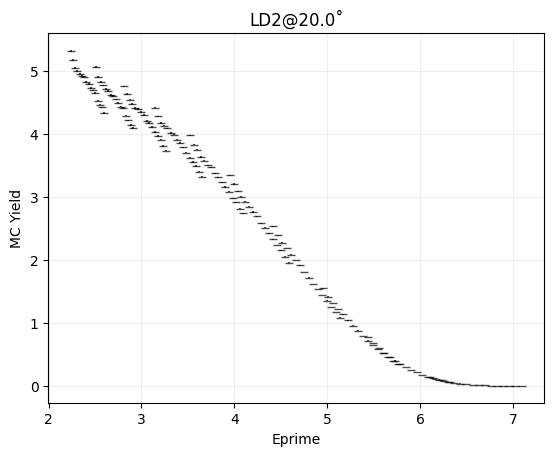

In [26]:
fig4, ax4 = plt.subplots()
# Plotting the histogram with error bars
ax4.errorbar(binned_eprime_bin_centers_2p42, bin_counts_eprime_2p42_dtg, yerr = bin_errors_eprime_2p42_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 2.42 GeV')
ax4.errorbar(binned_eprime_bin_centers_2p71, bin_counts_eprime_2p71_dtg, yerr = bin_errors_eprime_2p71_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 2.71 GeV')
ax4.errorbar(binned_eprime_bin_centers_3p04, bin_counts_eprime_3p04_dtg, yerr = bin_errors_eprime_3p04_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 3.04 GeV')
ax4.errorbar(binned_eprime_bin_centers_3p4, bin_counts_eprime_3p4_dtg, yerr = bin_errors_eprime_3p4_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 3.4 GeV')
ax4.errorbar(binned_eprime_bin_centers_3p81, bin_counts_eprime_3p81_dtg, yerr = bin_errors_eprime_3p81_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 3.81 GeV')
ax4.errorbar(binned_eprime_bin_centers_4p27, bin_counts_eprime_4p27_dtg, yerr = bin_errors_eprime_4p27_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 4.27 GeV')
ax4.errorbar(binned_eprime_bin_centers_4p78, bin_counts_eprime_4p78_dtg, yerr = bin_errors_eprime_4p78_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 4.78 GeV')
ax4.errorbar(binned_eprime_bin_centers_5p36, bin_counts_eprime_5p36_dtg, yerr = bin_errors_eprime_5p36_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 5.36 GeV')
ax4.errorbar(binned_eprime_bin_centers_5p878, bin_counts_eprime_5p878_dtg, yerr = bin_errors_eprime_5p878_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 5.878 GeV')
ax4.errorbar(binned_eprime_bin_centers_6p6, bin_counts_eprime_6p6_dtg, yerr = bin_errors_eprime_6p6_dtg, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 6.6 GeV')
ax4.grid(alpha = 0.2)
ax4.set_xlabel('Eprime')
ax4.set_ylabel('MC Yield')
# ax4.set_yscale('log')
# ax4.legend() 
ax4.set_title(f'{dtg}@{dang}˚')
# fig4.savefig(f'{folder}/eprime_{dtg}_{dang}_{start_time:.0f}.pdf')

<h1 align="center">DATA/SIMULATION YIELD RATIO FOR DTG</h1>

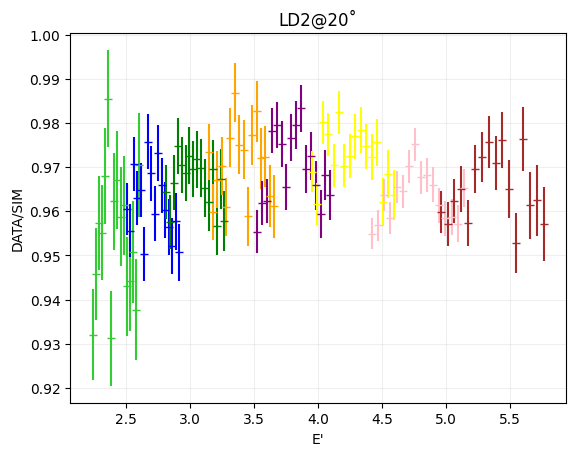

In [27]:
ratio_eprime_2p42_dtg = subtracted_bin_contents_2p42_dtg / bin_counts_eprime_2p42_dtg
ratio_eprime_2p71_dtg = subtracted_bin_contents_2p71_dtg / bin_counts_eprime_2p71_dtg
ratio_eprime_3p04_dtg = subtracted_bin_contents_3p04_dtg / bin_counts_eprime_3p04_dtg
ratio_eprime_3p4_dtg = subtracted_bin_contents_3p4_dtg / bin_counts_eprime_3p4_dtg
ratio_eprime_3p81_dtg = subtracted_bin_contents_3p81_dtg / bin_counts_eprime_3p81_dtg
ratio_eprime_4p27_dtg = subtracted_bin_contents_4p27_dtg / bin_counts_eprime_4p27_dtg
ratio_eprime_4p78_dtg = subtracted_bin_contents_4p78_dtg / bin_counts_eprime_4p78_dtg
ratio_eprime_5p36_dtg = subtracted_bin_contents_5p36_dtg / bin_counts_eprime_5p36_dtg
ratio_eprime_5p878_dtg = subtracted_bin_contents_5p878_dtg / bin_counts_eprime_5p878_dtg
ratio_eprime_6p6_dtg = subtracted_bin_contents_6p6_dtg / bin_counts_eprime_6p6_dtg

# Add errors in quadrature
ratio_errors_2p42_dtg = ratio_eprime_2p42_dtg * np.sqrt((subtracted_bin_errors_2p42_dtg / subtracted_bin_contents_2p42_dtg)**2 + (bin_errors_eprime_2p42_dtg / bin_counts_eprime_2p42_dtg)**2)
ratio_errors_2p71_dtg = ratio_eprime_2p71_dtg * np.sqrt((subtracted_bin_errors_2p71_dtg / subtracted_bin_contents_2p71_dtg)**2 + (bin_errors_eprime_2p71_dtg / bin_counts_eprime_2p71_dtg)**2)
ratio_errors_3p04_dtg = ratio_eprime_3p04_dtg * np.sqrt((subtracted_bin_errors_3p04_dtg / subtracted_bin_contents_3p04_dtg)**2 + (bin_errors_eprime_3p04_dtg / bin_counts_eprime_3p04_dtg)**2)
ratio_errors_3p4_dtg = ratio_eprime_3p4_dtg * np.sqrt((subtracted_bin_errors_3p4_dtg / subtracted_bin_contents_3p4_dtg)**2 + (bin_errors_eprime_3p4_dtg / bin_counts_eprime_3p4_dtg)**2)
ratio_errors_3p81_dtg = ratio_eprime_3p81_dtg * np.sqrt((subtracted_bin_errors_3p81_dtg / subtracted_bin_contents_3p81_dtg)**2 + (bin_errors_eprime_3p81_dtg / bin_counts_eprime_3p81_dtg)**2)
ratio_errors_4p27_dtg = ratio_eprime_4p27_dtg * np.sqrt((subtracted_bin_errors_4p27_dtg / subtracted_bin_contents_4p27_dtg)**2 + (bin_errors_eprime_4p27_dtg / bin_counts_eprime_4p27_dtg)**2)
ratio_errors_4p78_dtg = ratio_eprime_4p78_dtg * np.sqrt((subtracted_bin_errors_4p78_dtg / subtracted_bin_contents_4p78_dtg)**2 + (bin_errors_eprime_4p78_dtg / bin_counts_eprime_4p78_dtg)**2)
ratio_errors_5p36_dtg = ratio_eprime_5p36_dtg * np.sqrt((subtracted_bin_errors_5p36_dtg / subtracted_bin_contents_5p36_dtg)**2 + (bin_errors_eprime_5p36_dtg / bin_counts_eprime_5p36_dtg)**2)
ratio_errors_5p878_dtg = ratio_eprime_5p878_dtg * np.sqrt((subtracted_bin_errors_5p878_dtg / subtracted_bin_contents_5p878_dtg)**2 + (bin_errors_eprime_5p878_dtg / bin_counts_eprime_5p878_dtg)**2)
ratio_errors_6p6_dtg = ratio_eprime_6p6_dtg * np.sqrt((subtracted_bin_errors_6p6_dtg / subtracted_bin_contents_6p6_dtg)**2 + (bin_errors_eprime_6p6_dtg / bin_counts_eprime_6p6_dtg)**2)

fig5, ax5 = plt.subplots()
ax5.errorbar(binned_eprime_bin_centers_2p42, ratio_eprime_2p42_dtg, yerr = ratio_errors_2p42_dtg, fmt = '_', color = 'limegreen', label = '2.42 GeV')
ax5.errorbar(binned_eprime_bin_centers_2p71, ratio_eprime_2p71_dtg, yerr = ratio_errors_2p71_dtg, fmt = '_', color = 'blue', label = '2.71 GeV')
ax5.errorbar(binned_eprime_bin_centers_3p04, ratio_eprime_3p04_dtg, yerr = ratio_errors_3p04_dtg, fmt = '_', color = 'green', label = '3.04 GeV')
ax5.errorbar(binned_eprime_bin_centers_3p4, ratio_eprime_3p4_dtg, yerr = ratio_errors_3p4_dtg, fmt = '_', color = 'orange', label = '3.4 GeV')
ax5.errorbar(binned_eprime_bin_centers_3p81, ratio_eprime_3p81_dtg, yerr = ratio_errors_3p81_dtg, fmt = '_', color = 'purple', label = '3.81 GeV')
ax5.errorbar(binned_eprime_bin_centers_4p27, ratio_eprime_4p27_dtg, yerr = ratio_errors_4p27_dtg, fmt = '_', color = 'yellow', label = '4.27 GeV')
ax5.errorbar(binned_eprime_bin_centers_4p78, ratio_eprime_4p78_dtg, yerr = ratio_errors_4p78_dtg, fmt = '_', color = 'pink', label = '4.78 GeV')
ax5.errorbar(binned_eprime_bin_centers_5p36, ratio_eprime_5p36_dtg, yerr = ratio_errors_5p36_dtg, fmt = '_', color = 'brown', label = '5.36 GeV')
# ax5.errorbar(binned_eprime_bin_centers_5p878, ratio_eprime_5p878_dtg, yerr = ratio_errors_5p878_dtg, fmt = '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
# ax5.errorbar(binned_eprime_bin_centers_6p6, ratio_eprime_6p6_dtg, yerr = ratio_errors_6p6_dtg, fmt = '_', alpha = 0.7, color = 'limegreen', label = '6.6 GeV')
ax5.set_xlabel('E\'')
ax5.set_ylabel('DATA/SIM')
ax5.set_title(f'{dtg}@{idang}˚')
# ax5.set_ylim(0.9, 1.1)
ax5.grid(alpha = 0.2)
fig5.savefig(f'{folder}/ratio_eprime_{dtg}_{dang}_{folder}_{start_time:.0f}.pdf')

<h1 align="center">BORN CROSS SECTION CALCULATION FOR DTG</h1>

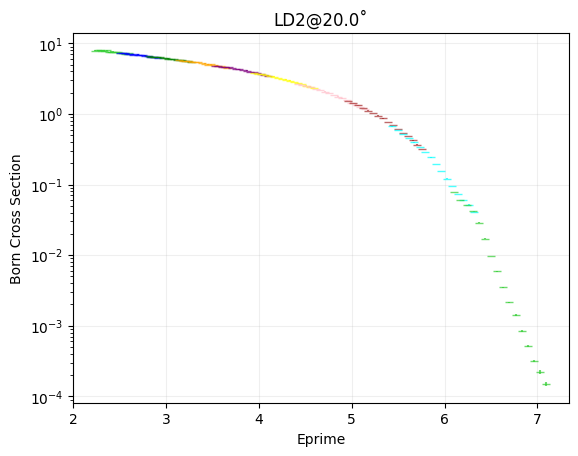

In [28]:
# Interpolate again to get model Born cross-section
born_xsec_array_2p42_dtg = griddata(points_dtg, V6, points_to_interpolate_2p42, method = 'linear')
born_xsec_array_2p71_dtg = griddata(points_dtg, V6, points_to_interpolate_2p71, method = 'linear')
born_xsec_array_3p04_dtg = griddata(points_dtg, V6, points_to_interpolate_3p04, method = 'linear')
born_xsec_array_3p4_dtg = griddata(points_dtg, V6, points_to_interpolate_3p4, method = 'linear')
born_xsec_array_3p81_dtg = griddata(points_dtg, V6, points_to_interpolate_3p81, method = 'linear')
born_xsec_array_4p27_dtg = griddata(points_dtg, V6, points_to_interpolate_4p27, method = 'linear')
born_xsec_array_4p78_dtg = griddata(points_dtg, V6, points_to_interpolate_4p78, method = 'linear')
born_xsec_array_5p36_dtg = griddata(points_dtg, V6, points_to_interpolate_5p36, method = 'linear')
born_xsec_array_5p878_dtg = griddata(points_dtg, V6, points_to_interpolate_5p878, method = 'linear')
born_xsec_array_6p6_dtg = griddata(points_dtg, V6, points_to_interpolate_6p6, method = 'linear')

# Get the QE piece
qe_array_2p42_dtg = griddata(points_dtg, V8, points_to_interpolate_2p42, method = 'linear')
qe_array_2p71_dtg = griddata(points_dtg, V8, points_to_interpolate_2p71, method = 'linear')
qe_array_3p04_dtg = griddata(points_dtg, V8, points_to_interpolate_3p04, method = 'linear')
qe_array_3p4_dtg = griddata(points_dtg, V8, points_to_interpolate_3p4, method = 'linear')
qe_array_3p81_dtg = griddata(points_dtg, V8, points_to_interpolate_3p81, method = 'linear')
qe_array_4p27_dtg = griddata(points_dtg, V8, points_to_interpolate_4p27, method = 'linear')
qe_array_4p78_dtg = griddata(points_dtg, V8, points_to_interpolate_4p78, method = 'linear')
qe_array_5p36_dtg = griddata(points_dtg, V8, points_to_interpolate_5p36, method = 'linear')
qe_array_5p878_dtg = griddata(points_dtg, V8, points_to_interpolate_5p878, method = 'linear')
qe_array_6p6_dtg = griddata(points_dtg, V8, points_to_interpolate_6p6, method = 'linear')

# Interpolate 3rd time to get Coulomb correction factor
ccf_2p42_dtg = griddata(points_dtg, V13, points_to_interpolate_2p42, method = 'linear')
ccf_2p71_dtg = griddata(points_dtg, V13, points_to_interpolate_2p71, method = 'linear')
ccf_3p04_dtg = griddata(points_dtg, V13, points_to_interpolate_3p04, method = 'linear')
ccf_3p4_dtg = griddata(points_dtg, V13, points_to_interpolate_3p4, method = 'linear')
ccf_3p81_dtg = griddata(points_dtg, V13, points_to_interpolate_3p81, method = 'linear')
ccf_4p27_dtg = griddata(points_dtg, V13, points_to_interpolate_4p27, method = 'linear')
ccf_4p78_dtg = griddata(points_dtg, V13, points_to_interpolate_4p78, method = 'linear')
ccf_5p36_dtg = griddata(points_dtg, V13, points_to_interpolate_5p36, method = 'linear')
ccf_5p878_dtg = griddata(points_dtg, V13, points_to_interpolate_5p878, method = 'linear')
ccf_6p6_dtg = griddata(points_dtg, V13, points_to_interpolate_6p6, method = 'linear')

# Calculate the data Born cross-section and apply Coloumb corrections
born_cross_2p42_dtg = ratio_eprime_2p42_dtg * born_xsec_array_2p42_dtg * ccf_2p42_dtg
born_cross_2p71_dtg = ratio_eprime_2p71_dtg * born_xsec_array_2p71_dtg * ccf_2p71_dtg
born_cross_3p04_dtg = ratio_eprime_3p04_dtg * born_xsec_array_3p04_dtg * ccf_3p04_dtg
born_cross_3p4_dtg = ratio_eprime_3p4_dtg * born_xsec_array_3p4_dtg * ccf_3p4_dtg
born_cross_3p81_dtg = ratio_eprime_3p81_dtg * born_xsec_array_3p81_dtg * ccf_3p81_dtg
born_cross_4p27_dtg = ratio_eprime_4p27_dtg * born_xsec_array_4p27_dtg * ccf_4p27_dtg
born_cross_4p78_dtg = ratio_eprime_4p78_dtg * born_xsec_array_4p78_dtg * ccf_4p78_dtg
born_cross_5p36_dtg = ratio_eprime_5p36_dtg * born_xsec_array_5p36_dtg * ccf_5p36_dtg
born_cross_5p878_dtg = ratio_eprime_5p878_dtg * born_xsec_array_5p878_dtg * ccf_5p878_dtg
born_cross_6p6_dtg = ratio_eprime_6p6_dtg * born_xsec_array_6p6_dtg * ccf_6p6_dtg

# Error propagation
born_errors_2p42_dtg = born_cross_2p42_dtg * ratio_errors_2p42_dtg
born_errors_2p71_dtg = born_cross_2p71_dtg * ratio_errors_2p71_dtg
born_errors_3p04_dtg = born_cross_3p04_dtg * ratio_errors_3p04_dtg
born_errors_3p4_dtg = born_cross_3p4_dtg * ratio_errors_3p4_dtg
born_errors_3p81_dtg = born_cross_3p81_dtg * ratio_errors_3p81_dtg
born_errors_4p27_dtg = born_cross_4p27_dtg * ratio_errors_4p27_dtg
born_errors_4p78_dtg = born_cross_4p78_dtg * ratio_errors_4p78_dtg
born_errors_5p36_dtg = born_cross_5p36_dtg * ratio_errors_5p36_dtg
born_errors_5p878_dtg = born_cross_5p878_dtg * ratio_errors_5p878_dtg
born_errors_6p6_dtg = born_cross_6p6_dtg * ratio_errors_6p6_dtg

fig6, ax6 = plt.subplots()
ax6.errorbar(binned_eprime_bin_centers_2p42, born_cross_2p42_dtg, yerr = born_errors_2p42_dtg, fmt = '_', alpha = 0.7, color = 'limegreen', label = '2.42 GeV')
ax6.errorbar(binned_eprime_bin_centers_2p71, born_cross_2p71_dtg, yerr = born_errors_2p71_dtg, fmt = '_', alpha = 0.7, color = 'blue', label = '2.71 GeV')
ax6.errorbar(binned_eprime_bin_centers_3p04, born_cross_3p04_dtg, yerr = born_errors_3p04_dtg, fmt = '_', alpha = 0.7, color = 'green', label = '3.04 GeV')
ax6.errorbar(binned_eprime_bin_centers_3p4, born_cross_3p4_dtg, yerr = born_errors_3p4_dtg, fmt = '_', alpha = 0.7, color = 'orange', label = '3.4 GeV')
ax6.errorbar(binned_eprime_bin_centers_3p81, born_cross_3p81_dtg, yerr = born_errors_3p81_dtg, fmt = '_', alpha = 0.7, color = 'purple', label = '3.81 GeV')
ax6.errorbar(binned_eprime_bin_centers_4p27, born_cross_4p27_dtg, yerr = born_errors_4p27_dtg, fmt = '_', alpha = 0.7, color = 'yellow', label = '4.27 GeV')
ax6.errorbar(binned_eprime_bin_centers_4p78, born_cross_4p78_dtg, yerr = born_errors_4p78_dtg, fmt = '_', alpha = 0.7, color = 'pink', label = '4.78 GeV')
ax6.errorbar(binned_eprime_bin_centers_5p36, born_cross_5p36_dtg, yerr = born_errors_5p36_dtg, fmt = '_', alpha = 0.7, color = 'brown', label = '5.36 GeV')
ax6.errorbar(binned_eprime_bin_centers_5p878, born_cross_5p878_dtg, yerr = born_errors_5p878_dtg, fmt = '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
ax6.errorbar(binned_eprime_bin_centers_6p6, born_cross_6p6_dtg, yerr = born_errors_6p6_dtg, fmt = '_', alpha = 0.7, color = 'limegreen', label = '6.6 GeV')
ax6.set_xlabel('Eprime')
ax6.set_ylabel('Born Cross Section')
ax6.set_title(f'{dtg}@{dang}˚')
ax6.set_yscale('log')
#ax6.legend()
ax6.grid(alpha = 0.2)
# fig6.savefig(f'{folder}/xsec_{dtg}_{dang}_{start_time:.0f}.pdf')

<h1 align="center">TAKING CROSS-SECTION RATIOS</h1>

Per-nucleon scaling factor: 6.0
slope -0.04281309276732588


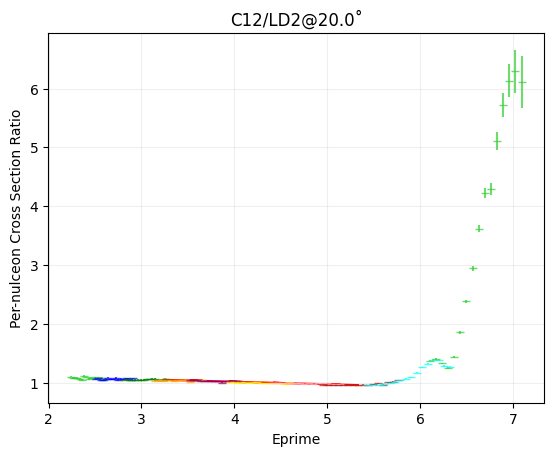

In [29]:
nA = target_info[ntg][1]
nZ = target_info[ntg][0]
dA = target_info[dtg][1]

sf = nA/dA
print("Per-nucleon scaling factor:", sf)

csr_2p42 = born_cross_2p42_ntg / born_cross_2p42_dtg / sf
csr_2p71 = born_cross_2p71_ntg / born_cross_2p71_dtg / sf
csr_3p04 = born_cross_3p04_ntg / born_cross_3p04_dtg / sf
csr_3p4 = born_cross_3p4_ntg / born_cross_3p4_dtg / sf
csr_3p81 = born_cross_3p81_ntg / born_cross_3p81_dtg / sf
csr_4p27 = born_cross_4p27_ntg / born_cross_4p27_dtg / sf
csr_4p78 = born_cross_4p78_ntg / born_cross_4p78_dtg / sf
csr_5p36 = born_cross_5p36_ntg / born_cross_5p36_dtg / sf
csr_5p878 = born_cross_5p878_ntg / born_cross_5p878_dtg / sf
csr_6p6 = born_cross_6p6_ntg / born_cross_6p6_dtg / sf

csr_errors_2p42 = csr_2p42 * np.sqrt((born_errors_2p42_ntg / born_cross_2p42_ntg)**2 + (born_errors_2p42_dtg / born_cross_2p42_dtg)**2)
csr_errors_2p71 = csr_2p71 * np.sqrt((born_errors_2p71_ntg / born_cross_2p71_ntg)**2 + (born_errors_2p71_dtg / born_cross_2p71_dtg)**2)
csr_errors_3p04 = csr_3p04 * np.sqrt((born_errors_3p04_ntg / born_cross_3p04_ntg)**2 + (born_errors_3p04_dtg / born_cross_3p04_dtg)**2)
csr_errors_3p4 = csr_3p4 * np.sqrt((born_errors_3p4_ntg / born_cross_3p4_ntg)**2 + (born_errors_3p4_dtg / born_cross_3p4_dtg)**2)
csr_errors_3p81 = csr_3p81 * np.sqrt((born_errors_3p81_ntg / born_cross_3p81_ntg)**2 + (born_errors_3p81_dtg / born_cross_3p81_dtg)**2)
csr_errors_4p27 = csr_4p27 * np.sqrt((born_errors_4p27_ntg / born_cross_4p27_ntg)**2 + (born_errors_4p27_dtg / born_cross_4p27_dtg)**2)
csr_errors_4p78 = csr_4p78 * np.sqrt((born_errors_4p78_ntg / born_cross_4p78_ntg)**2 + (born_errors_4p78_dtg / born_cross_4p78_dtg)**2)
csr_errors_5p36 = csr_5p36 * np.sqrt((born_errors_5p36_ntg / born_cross_5p36_ntg)**2 + (born_errors_5p36_dtg / born_cross_5p36_dtg)**2)
csr_errors_5p878 = csr_5p878 * np.sqrt((born_errors_5p878_ntg / born_cross_5p878_ntg)**2 + (born_errors_5p878_dtg / born_cross_5p878_dtg)**2)
csr_errors_6p6 = csr_6p6 * np.sqrt((born_errors_6p6_ntg / born_cross_6p6_ntg)**2 + (born_errors_6p6_dtg / born_cross_6p6_dtg)**2)

fig7, ax7 = plt.subplots()
ax7.errorbar(binned_eprime_bin_centers_2p42, csr_2p42, yerr = csr_errors_2p42, fmt = '_', alpha = 0.7, color = 'limegreen', label = '2.42 GeV')
ax7.errorbar(binned_eprime_bin_centers_2p71, csr_2p71, yerr = csr_errors_2p71, fmt = '_', alpha = 0.7, color = 'blue', label = '2.71 GeV')
ax7.errorbar(binned_eprime_bin_centers_3p04, csr_3p04, yerr = csr_errors_3p04, fmt = '_', alpha = 0.7, color = 'green', label = '3.04 GeV')
ax7.errorbar(binned_eprime_bin_centers_3p4, csr_3p4, yerr = csr_errors_3p4, fmt = '_', alpha = 0.7, color = 'orange', label = '3.4 GeV')
ax7.errorbar(binned_eprime_bin_centers_3p81, csr_3p81, yerr = csr_errors_3p81, fmt = '_', alpha = 0.7, color = 'purple', label = '3.81 GeV')
ax7.errorbar(binned_eprime_bin_centers_4p27, csr_4p27, yerr = csr_errors_4p27, fmt = '_', alpha = 0.7, color = 'yellow', label = '4.27 GeV')
ax7.errorbar(binned_eprime_bin_centers_4p78, csr_4p78, yerr = csr_errors_4p78, fmt = '_', alpha = 0.7, color = 'pink', label = '4.78 GeV')
ax7.errorbar(binned_eprime_bin_centers_5p36, csr_5p36, yerr = csr_errors_5p36, fmt = '_', alpha = 0.7, color = 'brown', label = '5.36 GeV')
ax7.errorbar(binned_eprime_bin_centers_5p878, csr_5p878, yerr = csr_errors_5p878, fmt = '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
ax7.errorbar(binned_eprime_bin_centers_6p6, csr_6p6, yerr = csr_errors_6p6, fmt = '_', alpha = 0.7, color = 'limegreen', label = '6.6 GeV')
ax7.set_xlabel('Eprime')
ax7.set_ylabel('Per-nulceon Cross Section Ratio')
ax7.set_title(f'{ntg}/{dtg}@{dang}˚')
ax7.grid(alpha = 0.2)
# ax7.set_ylim(0.82, 1.2)
# ax7.legend(loc = 'upper right', bbox_to_anchor = (1.3, 1.0))

csr = np.concatenate((csr_2p42, csr_2p71, csr_3p04, csr_3p4, csr_3p81, csr_4p27, csr_4p78, csr_5p36, csr_5p878, csr_6p6))
bin_centers = np.concatenate((binned_eprime_bin_centers_2p42, binned_eprime_bin_centers_2p71, binned_eprime_bin_centers_3p04, binned_eprime_bin_centers_3p4, binned_eprime_bin_centers_3p81, binned_eprime_bin_centers_4p27, binned_eprime_bin_centers_4p78, binned_eprime_bin_centers_5p36, binned_eprime_bin_centers_5p878, binned_eprime_bin_centers_6p6))
mask = (bin_centers >= 3.23) & (bin_centers <= 5.36) & ~np.isnan(csr)
filtered_csr = csr[mask]
filtered_bin_centers = bin_centers[mask]

slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_bin_centers, filtered_csr)
print("slope", slope)
# print("high point", slope * np.max(filtered_bin_centers) + intercept)
# print("low point", slope * np.min(filtered_bin_centers) + intercept)
ax7.plot(filtered_bin_centers, slope * filtered_bin_centers + intercept, 'r')
# fig7.savefig(f'{folder}/csr_{ntg}_{dtg}_{dang}_{start_time:.0f}.pdf')

<h1 align="center">Converting to Bjorken-x</h1>

absolute value of slope 0.23639757784404983
EMC Ratio at x = 0.3: 1.0421262588624618


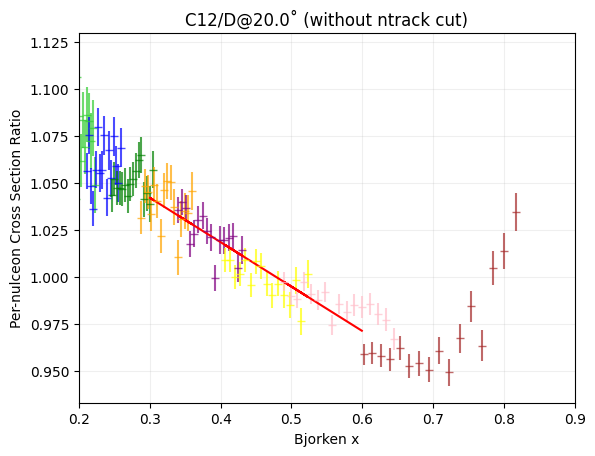

In [30]:
bin_centers_bjx_2p42 = (4 * Ei * binned_eprime_bin_centers_2p42 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_2p42))
bin_centers_bjx_2p71 = (4 * Ei * binned_eprime_bin_centers_2p71 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_2p71))
bin_centers_bjx_3p04 = (4 * Ei * binned_eprime_bin_centers_3p04 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_3p04))
bin_centers_bjx_3p4 = (4 * Ei * binned_eprime_bin_centers_3p4 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_3p4))
bin_centers_bjx_3p81 = (4 * Ei * binned_eprime_bin_centers_3p81 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_3p81))
bin_centers_bjx_4p27 = (4 * Ei * binned_eprime_bin_centers_4p27 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_4p27))
bin_centers_bjx_4p78 = (4 * Ei * binned_eprime_bin_centers_4p78 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_4p78))
bin_centers_bjx_5p36 = (4 * Ei * binned_eprime_bin_centers_5p36 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_5p36))
bin_centers_bjx_5p878 = (4 * Ei * binned_eprime_bin_centers_5p878 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_5p878))
bin_centers_bjx_6p6 = (4 * Ei * binned_eprime_bin_centers_6p6 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_6p6))

fig8, ax8 = plt.subplots()
ax8.errorbar(bin_centers_bjx_2p42, csr_2p42, yerr = csr_errors_2p42, fmt = '_', alpha = 0.7, color = 'limegreen', label = '2.42 GeV')
ax8.errorbar(bin_centers_bjx_2p71, csr_2p71, yerr = csr_errors_2p71, fmt = '_', alpha = 0.7, color = 'blue', label = '2.71 GeV')
ax8.errorbar(bin_centers_bjx_3p04, csr_3p04, yerr = csr_errors_3p04, fmt = '_', alpha = 0.7, color = 'green', label = '3.04 GeV')
ax8.errorbar(bin_centers_bjx_3p4, csr_3p4, yerr = csr_errors_3p4, fmt = '_', alpha = 0.7, color = 'orange', label = '3.4 GeV')
ax8.errorbar(bin_centers_bjx_3p81, csr_3p81, yerr = csr_errors_3p81, fmt = '_', alpha = 0.7, color = 'purple', label = '3.81 GeV')
ax8.errorbar(bin_centers_bjx_4p27, csr_4p27, yerr = csr_errors_4p27, fmt = '_', alpha = 0.7, color = 'yellow', label = '4.27 GeV')
ax8.errorbar(bin_centers_bjx_4p78, csr_4p78, yerr = csr_errors_4p78, fmt = '_', alpha = 0.7, color = 'pink', label = '4.78 GeV')
ax8.errorbar(bin_centers_bjx_5p36, csr_5p36, yerr = csr_errors_5p36, fmt = '_', alpha = 0.7, color = 'brown', label = '5.36 GeV')
# ax8.errorbar(bin_centers_bjx_5p878, csr_5p878, yerr = csr_errors_5p878, fmt = '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
# ax8.errorbar(bin_centers_bjx_6p6, csr_6p6, yerr = csr_errors_6p6, fmt = '_', alpha = 0.7, color = 'limegreen', label = '6.6 GeV')
ax8.set_xlabel('Bjorken x')
ax8.set_ylabel('Per-nulceon Cross Section Ratio')
ax8.set_title(f'{ntg}/D@{dang}˚ (without ntrack cut)')
# ax8.set_ylim(0.75, 1.1)
ax8.set_xlim(0.2, 0.9)
ax8.grid(alpha = 0.2)

bjx_bin_centers = np.concatenate((bin_centers_bjx_2p42, bin_centers_bjx_2p71, bin_centers_bjx_3p04, bin_centers_bjx_3p4, bin_centers_bjx_3p81, bin_centers_bjx_4p27, bin_centers_bjx_4p78, bin_centers_bjx_5p36, bin_centers_bjx_5p878, bin_centers_bjx_6p6))
mask = (bjx_bin_centers >= 0.3) & (bjx_bin_centers <= 0.6) & ~np.isnan(csr)
filtered_bin_centers = bjx_bin_centers[mask]
filtered_csr = csr[mask]

slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_bin_centers, filtered_csr)
print("absolute value of slope", abs(slope))
print("EMC Ratio at x = 0.3:", slope * np.min(filtered_bin_centers) + intercept)
_  = ax8.plot(filtered_bin_centers, slope * filtered_bin_centers + intercept, 'r')
# fig8.savefig(f'{folder}/emc_{ntg}_{dtg}_{dang}_{start_time:.0f}.pdf')

# Calculating isoscalar correction factor

In [31]:
all_eprime_bin_centers = np.concatenate((binned_eprime_bin_centers_2p42, binned_eprime_bin_centers_2p71, binned_eprime_bin_centers_3p04, binned_eprime_bin_centers_3p4, binned_eprime_bin_centers_3p81, binned_eprime_bin_centers_4p27, binned_eprime_bin_centers_4p78, binned_eprime_bin_centers_5p36, binned_eprime_bin_centers_5p878, binned_eprime_bin_centers_6p6))
all_bjx = np.concatenate((bin_centers_bjx_2p42, bin_centers_bjx_2p71, bin_centers_bjx_3p04, bin_centers_bjx_3p4, bin_centers_bjx_3p81, bin_centers_bjx_4p27, bin_centers_bjx_4p78, bin_centers_bjx_5p36, bin_centers_bjx_5p878, bin_centers_bjx_6p6))
isoscalar_all = np.zeros(len(all_eprime_bin_centers))
q2_all = 4 * Ei * all_eprime_bin_centers * (np.sin(dang * np.pi / 180 / 2))**2
print(f"The minimum and maximum Q^2 values are {np.min(q2_all):.2f} and {np.max(q2_all):.2f}")

for i in range(len(all_eprime_bin_centers)):
    isoscalar_all[i] = jra_nprat(all_bjx[i], q2_all[i])

print("Average of q2_all", np.mean(q2_all))
print("Average of Bjorken x", np.mean(all_bjx))
print("Length and average of isoscalar_all", len(isoscalar_all), np.mean(isoscalar_all))

# a = plt.plot(all_bjx[isoscalar_all != 1], isoscalar_all[isoscalar_all != 1], '_', alpha = 0.7, color = 'blue')
# plt.xlabel('Bjorken x')
# plt.ylabel(r'$F^2_n/F^2_p$')
# plt.grid(alpha = 0.2)

The minimum and maximum Q^2 values are 2.85 and 9.02
Average of q2_all 5.37344441814154
Average of Bjorken x 0.5154917994149264
Length and average of isoscalar_all 160 0.5993635509065884


\begin{equation}
    \text{isoscalar all} = \frac{\sigma_n}{\sigma_p}
\end{equation}

# Calculating and Plotting the final Cross-Section Ratios

\begin{equation}
    \left( \frac{\sigma_A}{\sigma_D} \right)_{\text{ISO}} = \frac{A}{2} \left( \frac{1 + \frac{\sigma_n}{\sigma_p}}{Z + N \frac{\sigma_n}{\sigma_p}} \right) \frac{\sigma_A}{\sigma_D},
\end{equation}

\begin{equation}
    \text{isoscalar factor} = \frac{A}{2} \left( \frac{1 + \frac{\sigma_n}{\sigma_p}}{Z + N \frac{\sigma_n}{\sigma_p}} \right)
\end{equation}

nN 6
nZ 6
nA 12
Mean of isoscalar_factor 1.0


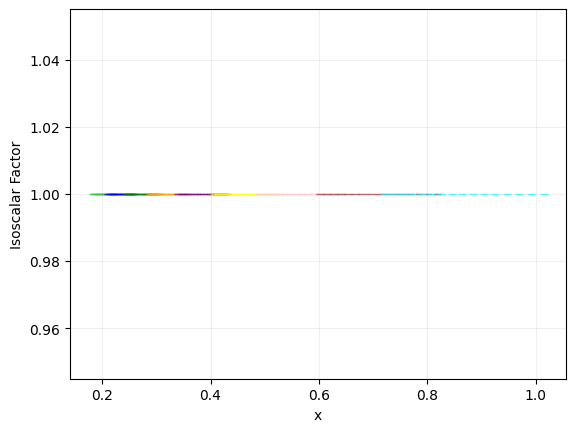

In [32]:
nN = nA - nZ
print("nN", nN)
print("nZ", nZ)
print("nA", nA)

isoscalar_factor = (nA/2 * (1 + isoscalar_all))/(nZ + (nN * isoscalar_all))
isoscalar_factor_2p42 = isoscalar_factor[0:len(binned_eprime_bin_centers_2p42)]
isoscalar_factor_2p71 = isoscalar_factor[len(binned_eprime_bin_centers_2p42):2 * len(binned_eprime_bin_centers_2p71)]
isoscalar_factor_3p04 = isoscalar_factor[2 * len(binned_eprime_bin_centers_2p71):3 * len(binned_eprime_bin_centers_3p04)]
isoscalar_factor_3p4 = isoscalar_factor[3 * len(binned_eprime_bin_centers_3p04):4 * len(binned_eprime_bin_centers_3p4)]
isoscalar_factor_3p81 = isoscalar_factor[4 * len(binned_eprime_bin_centers_3p4):5 * len(binned_eprime_bin_centers_3p81)]
isoscalar_factor_4p27 = isoscalar_factor[5 * len(binned_eprime_bin_centers_3p81):6 * len(binned_eprime_bin_centers_4p27)]
isoscalar_factor_4p78 = isoscalar_factor[6 * len(binned_eprime_bin_centers_4p27):7 * len(binned_eprime_bin_centers_4p78)]
isoscalar_factor_5p36 = isoscalar_factor[7 * len(binned_eprime_bin_centers_4p78):8 * len(binned_eprime_bin_centers_5p36)]
isoscalar_factor_5p878 = isoscalar_factor[8 * len(binned_eprime_bin_centers_5p36):9 * len(binned_eprime_bin_centers_5p878)]
isoscalar_factor_6p6 = isoscalar_factor[9 * len(binned_eprime_bin_centers_5p878):10 * len(binned_eprime_bin_centers_6p6)]
print("Mean of isoscalar_factor", np.mean(isoscalar_factor))

# Apply isoscalar correction to cross-section ratios
iso_csr_2p42 = csr_2p42 * isoscalar_factor_2p42
iso_csr_2p71 = csr_2p71 * isoscalar_factor_2p71
iso_csr_3p04 = csr_3p04 * isoscalar_factor_3p04
iso_csr_3p4 = csr_3p4 * isoscalar_factor_3p4
iso_csr_3p81 = csr_3p81 * isoscalar_factor_3p81
iso_csr_4p27 = csr_4p27 * isoscalar_factor_4p27
iso_csr_4p78 = csr_4p78 * isoscalar_factor_4p78
iso_csr_5p36 = csr_5p36 * isoscalar_factor_5p36
iso_csr_5p878 = csr_5p878 * isoscalar_factor_5p878
iso_csr_6p6 = csr_6p6 * isoscalar_factor_6p6

plt.plot(bin_centers_bjx_2p42, isoscalar_factor_2p42, '_', alpha = 0.7, color = 'limegreen', label = '2.42 GeV')
plt.plot(bin_centers_bjx_2p71, isoscalar_factor_2p71, '_', alpha = 0.7, color = 'blue', label = '2.71 GeV')
plt.plot(bin_centers_bjx_3p04, isoscalar_factor_3p04, '_', alpha = 0.7, color = 'green', label = '3.04 GeV')
plt.plot(bin_centers_bjx_3p4, isoscalar_factor_3p4, '_', alpha = 0.7, color = 'orange', label = '3.4 GeV')
plt.plot(bin_centers_bjx_3p81, isoscalar_factor_3p81, '_', alpha = 0.7, color = 'purple', label = '3.81 GeV')
plt.plot(bin_centers_bjx_4p27, isoscalar_factor_4p27, '_', alpha = 0.7, color = 'yellow', label = '4.27 GeV')
plt.plot(bin_centers_bjx_4p78, isoscalar_factor_4p78, '_', alpha = 0.7, color = 'pink', label = '4.78 GeV')
plt.plot(bin_centers_bjx_5p36, isoscalar_factor_5p36, '_', alpha = 0.7, color = 'brown', label = '5.36 GeV')
plt.plot(bin_centers_bjx_5p878, isoscalar_factor_5p878, '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
plt.grid(alpha = 0.2)
plt.xlabel('x')
_ = plt.ylabel('Isoscalar Factor')

Value of isoscalar corrected slope -0.23639757784405008


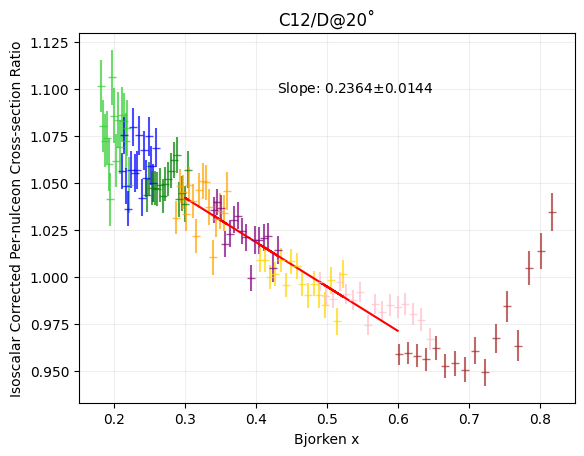

In [33]:
fig9, ax9 = plt.subplots()
ax9.errorbar(bin_centers_bjx_2p42, iso_csr_2p42, yerr = isoscalar_factor_2p42 * csr_errors_2p42, fmt = '_', alpha = 0.7, color = 'limegreen', label = '2.42 GeV')
ax9.errorbar(bin_centers_bjx_2p71, iso_csr_2p71, yerr = isoscalar_factor_2p71 * csr_errors_2p71, fmt = '_', alpha = 0.7, color = 'blue', label = '2.71 GeV')
ax9.errorbar(bin_centers_bjx_3p04, iso_csr_3p04, yerr = isoscalar_factor_3p04 * csr_errors_3p04, fmt = '_', alpha = 0.7, color = 'green', label = '3.04 GeV')
ax9.errorbar(bin_centers_bjx_3p4, iso_csr_3p4, yerr = isoscalar_factor_3p4 * csr_errors_3p4, fmt = '_', alpha = 0.7, color = 'orange', label = '3.4 GeV')
ax9.errorbar(bin_centers_bjx_3p81, iso_csr_3p81, yerr = isoscalar_factor_3p81 * csr_errors_3p81, fmt = '_', alpha = 0.7, color = 'purple', label = '3.81 GeV')
ax9.errorbar(bin_centers_bjx_4p27, iso_csr_4p27, yerr = isoscalar_factor_4p27 * csr_errors_4p27, fmt = '_', alpha = 0.7, color = 'gold', label = '4.27 GeV')
ax9.errorbar(bin_centers_bjx_4p78, iso_csr_4p78, yerr = isoscalar_factor_4p78 * csr_errors_4p78, fmt = '_', alpha = 0.7, color = 'pink', label = '4.78 GeV')
ax9.errorbar(bin_centers_bjx_5p36, iso_csr_5p36, yerr = isoscalar_factor_5p36 * csr_errors_5p36, fmt = '_', alpha = 0.7, color = 'brown', label = '5.36 GeV')
# ax9.errorbar(bin_centers_bjx_5p878, iso_csr_5p878, yerr = isoscalar_factor_5p878 * csr_errors_5p878, fmt = '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
# ax9.errorbar(bin_centers_bjx_6p6, iso_csr_6p6, yerr = isoscalar_factor_6p6 * csr_errors_6p6, fmt = '_', alpha = 0.7, color = 'limegreen', label = '6.6 GeV')

ax9.set_xlabel('Bjorken x')
# ax9.set_ylabel(fr'$\sigma_{ntg}$/{nA}/$\sigma_D$/2@{dang}˚')
ax9.set_ylabel('Isoscalar Corrected Per-nulceon Cross-section Ratio')
ax9.set_title(f'{ntg}/D@{idang}˚')
ax9.grid(alpha = 0.2)
# ax9.legend()

iso_csr = np.concatenate((iso_csr_2p42, iso_csr_2p71, iso_csr_3p04, iso_csr_3p4, iso_csr_3p81, iso_csr_4p27, iso_csr_4p78, iso_csr_5p36, iso_csr_5p878, iso_csr_6p6))
filtered_iso_csr = iso_csr[mask]

iso_slope, iso_intercept, iso_r_value, iso_p_value, iso_std_err = stats.linregress(filtered_bin_centers, filtered_iso_csr)
print("Value of isoscalar corrected slope", iso_slope)
norm_3 = iso_slope * np.min(filtered_bin_centers) + iso_intercept
# print("Error on slope", iso_std_err)
# print("EMC Ratio at x = 0.3:", norm_3)
ax9.plot(filtered_bin_centers, iso_slope * filtered_bin_centers + iso_intercept, 'r')
# ax9.set_ylim(0.6, 0.9)
# ax9.set_xlim(0.15, 1.0)
ax9.text(0.4, 0.79, f'Slope: {abs(iso_slope):.4f}$\pm${iso_std_err:.4f} \n', transform = ax9.transAxes)
fig9.savefig(f'{folder}/isoscalarcorrected_emc_{ntg}_{idang}_{folder}{start_time:.0f}.pdf')

# Write the final cross-section ratios to a file

In [34]:
filepath = f"/Users/AbSir/Desktop/JLab Research/Corrections/Delta Correction/csr_{ntg}_{dtg}_{dang}.txt"
with open(filepath, "w") as file:
    for i in range(len(bin_centers_bjx_2p42)):
        file.write(f"{bin_centers_bjx_2p42[i]}\t{iso_csr_2p42[i]}\t{csr_errors_2p42[i]}\t{iso_csr_2p71[i]}\t{csr_errors_2p71[i]}\t{iso_csr_3p04[i]}\t{csr_errors_3p04[i]}\t{iso_csr_3p4[i]}\t{csr_errors_3p4[i]}\t{iso_csr_3p81[i]}\t{csr_errors_3p81[i]}\t{iso_csr_4p27[i]}\t{csr_errors_4p27[i]}\t{iso_csr_4p78[i]}\t{csr_errors_4p78[i]}\t{iso_csr_5p36[i]}\t{csr_errors_5p36[i]}\t{iso_csr_5p878[i]}\t{csr_errors_5p878[i]}\t{iso_csr_6p6[i]}\t{csr_errors_6p6[i]}\n")

In [35]:
minutes = (time.time() - start_time) / 60
print(f"Time taken: {minutes:.2f} minutes")
baja()

Time taken: 31.93 minutes
